# <h1><center>**`Employee Attrition Problem`**</center></h1>

### `Dataset Desciption`

The dataset folder contains the following files:

**train_dataset.csv** = 1000000 x 8

**train_salaries.csv** = 1000000 x 2

**test_dataset.csv** =  1000000 x 8

Columns Provided in the Dataset

1. **jobId** - Unique ID that indicates the employee
2. **companyId** - Unique ID that idicates the company
3. **jobType** - Shows which post the employee is working for the company
4. **degree** - shows which degree is completed by the employee
5. **major** - shows the field in which the employee is specialised in
6. **industry** - show the industry in which the employee is working
7. **yearsExperience** - years of working experience the employee is having
8. **milesFromMetropolis** - distance in miles between the comapny and his house
9. **salary** - salary given to the employee.
eg. 250 indicates 2,50,000 in dollars

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [ ]:
# upload data in your drive and then run this
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the train_dataset, train_salaries, test_dataset(pass your file path from drive)

train_data = pd.read_csv('/content/train_dataset.csv')
train_data_salaries = pd.read_csv('/content/train_salaries.csv')
test_data = pd.read_csv('/content/test_dataset.csv')

In [ ]:
# check the train data

train_data.head()


jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH             10.0                 83.0  
1      WEB              3.0                 73.0  
2   HEALTH             10.0                 38.0  
3     AUTO              8.0                 17.0  
4  FINANCE              8.0                 16.0

In [ ]:
# check the train data salarie
train_data_salaries.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [ ]:
# check the test data

test_data.head()

jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0             22.0                 73.0  
1             20.0                 47.0  
2             17.0                  9.0  
3             14.0                 96.0  
4             10.0                 44.0

In [ ]:
# Adding salary data to train_dataset using merge on jobId
train_data = pd.merge(train_data,train_data_salaries,on='jobId',how='left')
train_data

jobId companyId         jobType       degree      major  \
0       JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1       JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2       JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3       JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4       JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
...                  ...       ...             ...          ...        ...   
465192  JOB1362684872879    COMP29             CTO  HIGH_SCHOOL       NONE   
465193  JOB1362684872880    COMP12         JANITOR  HIGH_SCHOOL       NONE   
465194  JOB1362684872881    COMP12             CFO      MASTERS    BIOLOGY   
465195  JOB1362684872882    COMP38          JUNIOR         NONE       NONE   
465196  JOB1362684872883    COMP48            JANI          NaN        NaN   

       industry  yearsExperience  milesFromMetropolis  salary  
0        HEALTH             10.0                 83.0     130  
1           WEB              3.0                 73.0     101  
2        HEALTH             10.0                 38.0     137  
3          AUTO              8.0                 17.0     142  
4       FINANCE              8.0                 16.0     163  
...         ...              ...                  ...     ...  
465192      OIL             12.0                 37.0     118  
465193      WEB             19.0                 36.0     108  
465194      WEB             11.0                 77.0     116  
465195     AUTO              0.0                 84.0      40  
465196      NaN              NaN                  NaN      94  

[465197 rows x 9 columns]

In [ ]:
#salaries less that 30 can be removed as such a such salary per month is not expected
train_data = train_data[train_data['salary']>=30]
print(train_data.head())

              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  salary  
0   HEALTH             10.0                 83.0     130  
1      WEB              3.0                 73.0     101  
2   HEALTH             10.0                 38.0     137  
3     AUTO              8.0                 17.0     142  
4  FINANCE              8.0                 16.0     163  


In [ ]:
print(f"Number of rows before filtering: {len(train_data_salaries)}")
print(f"Number of rows after filtering: {len(train_data)}")

Number of rows before filtering: 1000000
Number of rows after filtering: 464313


# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [ ]:
# get all column names
column_names =train_data.columns
column_names

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [ ]:
# Check which columns are having categorical, numerical or boolean values of train_dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 464313 entries, 0 to 465196
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   jobId                464313 non-null  object 
 1   companyId            464313 non-null  object 
 2   jobType              464313 non-null  object 
 3   degree               464312 non-null  object 
 4   major                464312 non-null  object 
 5   industry             464312 non-null  object 
 6   yearsExperience      464312 non-null  float64
 7   milesFromMetropolis  464312 non-null  float64
 8   salary               464313 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 35.4+ MB


In [ ]:
# Check which columns are having categorical, numerical or boolean values of test_dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465042 entries, 0 to 465041
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   jobId                465042 non-null  object 
 1   companyId            465041 non-null  object 
 2   jobType              465041 non-null  object 
 3   degree               465041 non-null  object 
 4   major                465041 non-null  object 
 5   industry             465041 non-null  object 
 6   yearsExperience      465041 non-null  float64
 7   milesFromMetropolis  465041 non-null  float64
dtypes: float64(2), object(6)
memory usage: 28.4+ MB


1. After checking the Dtypes of all the columns
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [ ]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
stats = train_data[['yearsExperience', 'milesFromMetropolis', 'salary']].describe()

# Print the descriptive statistics
stats

yearsExperience  milesFromMetropolis         salary
count    464312.000000        464312.000000  464313.000000
mean         12.002591            49.425440     116.275506
std           7.202258            28.881688      38.594943
min           0.000000             0.000000      30.000000
25%           6.000000            24.000000      89.000000
50%          12.000000            49.000000     114.000000
75%          18.000000            74.000000     141.000000
max          24.000000            99.000000     301.000000

In [ ]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
stats = test_data[['yearsExperience', 'milesFromMetropolis']].describe()

# Print the descriptive statistics
stats

yearsExperience  milesFromMetropolis
count    465041.000000        465041.000000
mean         11.995906            49.528627
std           7.214906            28.883293
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

## Get the total number of samples in the dataset using the len() function

In [ ]:
# len of train and test dataset

print("train data length:",len(train_data))
print("test data length:",len(test_data))


train data length: 464313
test data length: 465042


## Get unique values

In [ ]:
# get how many unique values are in train_dataset

unique_counts = train_data.nunique()
print(unique_counts)



jobId                  464313
companyId                  63
jobType                     9
degree                      5
major                       9
industry                    7
yearsExperience            25
milesFromMetropolis       100
salary                    263
dtype: int64


In [ ]:
# get how many unique values are in test_dataset
unique_counts = test_data.nunique()
print(unique_counts)

jobId                  465042
companyId                  63
jobType                     8
degree                      5
major                       9
industry                    7
yearsExperience            25
milesFromMetropolis       100
dtype: int64


## Counting the total number of missing values¶

In [ ]:
# Check for missing values in all the columnns of the train_dataset

train_data.isnull().sum()


jobId                  0
companyId              0
jobType                0
degree                 1
major                  1
industry               1
yearsExperience        1
milesFromMetropolis    1
salary                 0
dtype: int64

In [ ]:
 # Check for missing values in all the columnns of the test_dataset
missing_values = test_data.isna().sum()

# Print the count of missing values for each column
print(missing_values)

jobId                  0
companyId              1
jobType                1
degree                 1
major                  1
industry               1
yearsExperience        1
milesFromMetropolis    1
dtype: int64


## By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

## removing 'jobId' and 'companyId' data from train and test data

In [ ]:
# drop jobId and companyId from train_dataset
train_data = train_data.drop(columns=['jobId','companyId'])

train_data


jobType       degree      major industry  yearsExperience  \
0                  CFO      MASTERS       MATH   HEALTH             10.0   
1                  CEO  HIGH_SCHOOL       NONE      WEB              3.0   
2       VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH             10.0   
3              MANAGER     DOCTORAL  CHEMISTRY     AUTO              8.0   
4       VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE              8.0   
...                ...          ...        ...      ...              ...   
465192             CTO  HIGH_SCHOOL       NONE      OIL             12.0   
465193         JANITOR  HIGH_SCHOOL       NONE      WEB             19.0   
465194             CFO      MASTERS    BIOLOGY      WEB             11.0   
465195          JUNIOR         NONE       NONE     AUTO              0.0   
465196            JANI          NaN        NaN      NaN              NaN   

        milesFromMetropolis  salary  
0                      83.0     130  
1                      73.0     101  
2                      38.0     137  
3                      17.0     142  
4                      16.0     163  
...                     ...     ...  
465192                 37.0     118  
465193                 36.0     108  
465194                 77.0     116  
465195                 84.0      40  
465196                  NaN      94  

[464313 rows x 7 columns]

In [ ]:
# drop jobId and companyId from test_dataset
test_data = test_data.drop(columns=['jobId','companyId'])

test_data

jobType       degree     major industry  yearsExperience  \
0       MANAGER  HIGH_SCHOOL      NONE   HEALTH             22.0   
1        JUNIOR         NONE      NONE     AUTO             20.0   
2           CTO      MASTERS   BIOLOGY   HEALTH             17.0   
3       MANAGER  HIGH_SCHOOL      NONE      OIL             14.0   
4        JUNIOR     DOCTORAL   BIOLOGY      OIL             10.0   
...         ...          ...       ...      ...              ...   
465037      CEO      MASTERS  BUSINESS  FINANCE             16.0   
465038      CEO     DOCTORAL   COMPSCI  FINANCE              7.0   
465039   JUNIOR         NONE      NONE  FINANCE             20.0   
465040      CTO  HIGH_SCHOOL      NONE      WEB             11.0   
465041      NaN          NaN       NaN      NaN              NaN   

        milesFromMetropolis  
0                      73.0  
1                      47.0  
2                       9.0  
3                      96.0  
4                      44.0  
...                     ...  
465037                 84.0  
465038                  1.0  
465039                 39.0  
465040                 96.0  
465041                  NaN  

[465042 rows x 6 columns]

## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [ ]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = []
var_list = []
# looping on whole dataset for geting list of categorical data column name
for column in train_data.columns:
    # Check the data type of each column
    if train_data[column].dtype == 'object':
        categorical_list.append(column)
    elif pd.api.types.is_numeric_dtype(train_data[column]):
        var_list.append(column)

In [ ]:
# Print the lists to verify
print("Categorical columns:")
print(categorical_list)
print("\nNumerical columns:")
print(var_list)

Categorical columns:
['jobType', 'degree', 'major', 'industry']

Numerical columns:
['yearsExperience', 'milesFromMetropolis', 'salary']


## Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [ ]:
# Filter only numerical columns from the DataFrame
numerical_data = train_data.select_dtypes(include=['number'])
# Calculate the correlation matrix
corr = numerical_data.corr()
# Display the correlation matrix with a background gradient
styled_corr = corr.style.background_gradient(cmap='coolwarm').format("{:.2f}")
# Display the styled correlation matrix
styled_corr

## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

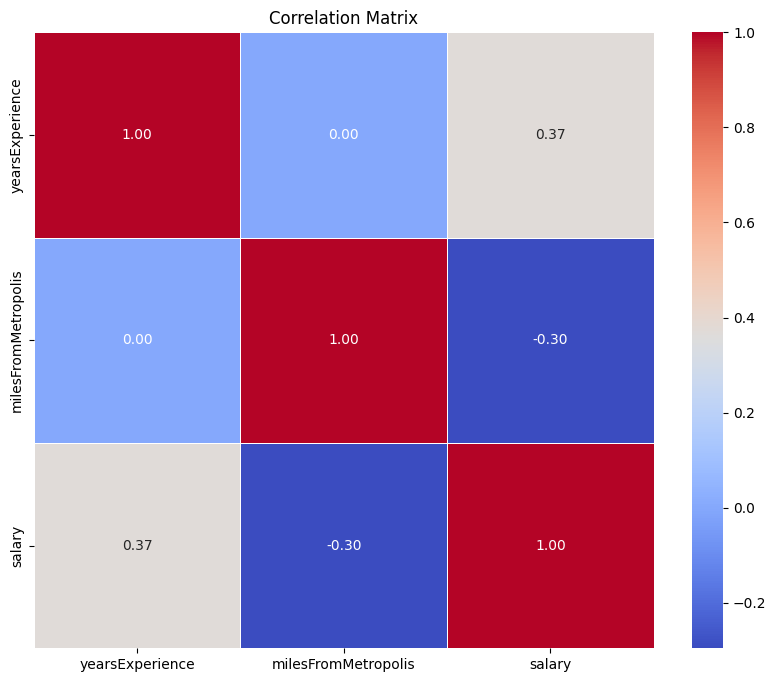

In [ ]:
# Filter only numerical columns from the DataFrame
numerical_data = train_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numerical_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and show the plot
plt.title('Correlation Matrix')
plt.show()

## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2

def perform_chi_square_test(var_1, var_2):
    # Create Contingency Table
    contingency_table = pd.crosstab(var_1, var_2)

    # Perform Chi-square test
    chi2_statistic, p_value, dof, expected_values = chi2_contingency(contingency_table)

    # Degree of Freedom
    no_of_rows, no_of_columns = contingency_table.shape
    degree_f = (no_of_rows - 1) * (no_of_columns - 1)
    print("Degree of Freedom: ", degree_f)

    # Significance Level 5%
    alpha = 0.05
    print('Significance level: ', alpha)

    # Chi-square statistic
    chi_square_statistic = chi2_statistic
    print("Chi-square statistic: ", chi_square_statistic)

    # Critical value
    critical_value = chi2.ppf(q=1 - alpha, df=degree_f)
    print('Critical value:', critical_value)

    # P-value
    print('P-value:', p_value)

    # Decision
    if chi_square_statistic >= critical_value:
        print("Reject H0: There is a relationship between the two categorical variables")
    else:
        print("Retain H0: There is no relationship between the two categorical variables")

    if p_value <= alpha:
        print("Reject H0: There is a relationship between the two categorical variables")
    else:
        print("Retain H0: There is no relationship between the two categorical variables")

# Loop through categorical columns and perform Chi-square test on each pair
for x in categorical_list:
    for i in categorical_list:
        if i != x:
            print(f'Chi-square test on: {x} and {i}\n')
            # Ensure to pass actual data from DataFrame
            perform_chi_square_test(train_data[x], train_data[i])
            print('-------------------------------------------------------------------\n')


Chi-square test on: jobType and degree

Degree of Freedom:  28
Significance level:  0.05
Chi-square statistic:  72757.07833793535
Critical value: 41.33713815142739
P-value: 0.0
Reject H0: There is a relationship between the two categorical variables
Reject H0: There is a relationship between the two categorical variables
-------------------------------------------------------------------

Chi-square test on: jobType and major

Degree of Freedom:  56
Significance level:  0.05
Chi-square statistic:  57586.25947726394
Critical value: 74.46832415930936
P-value: 0.0
Reject H0: There is a relationship between the two categorical variables
Reject H0: There is a relationship between the two categorical variables
-------------------------------------------------------------------

Chi-square test on: jobType and industry

Degree of Freedom:  42
Significance level:  0.05
Chi-square statistic:  70.04622931251512
Critical value: 58.12403768086803
P-value: 0.004251249389298033
Reject H0: There is a

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


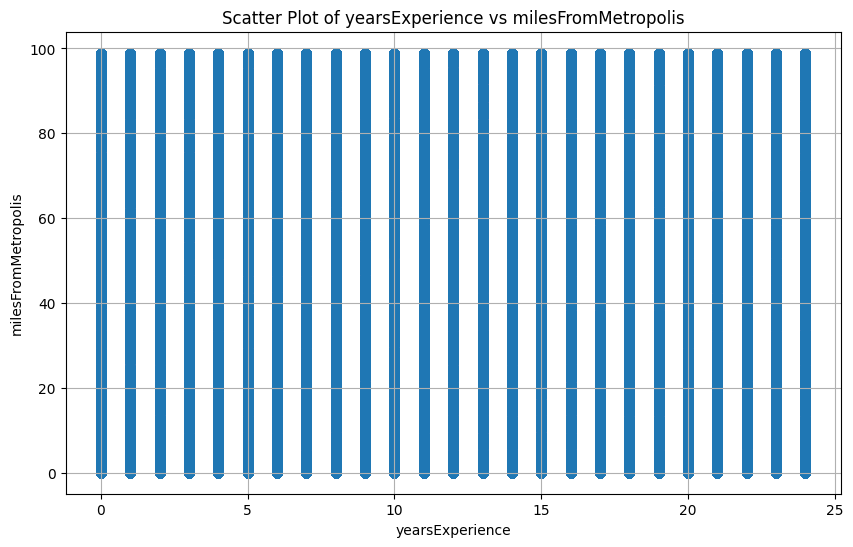

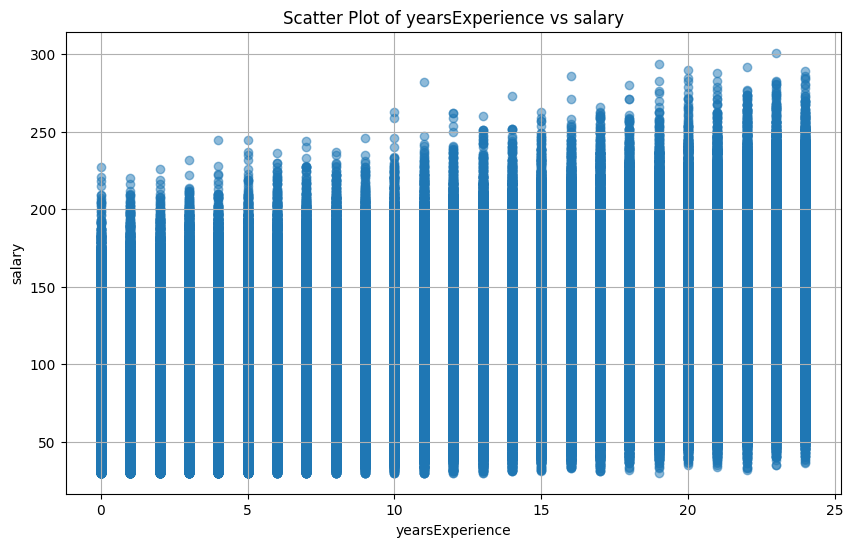

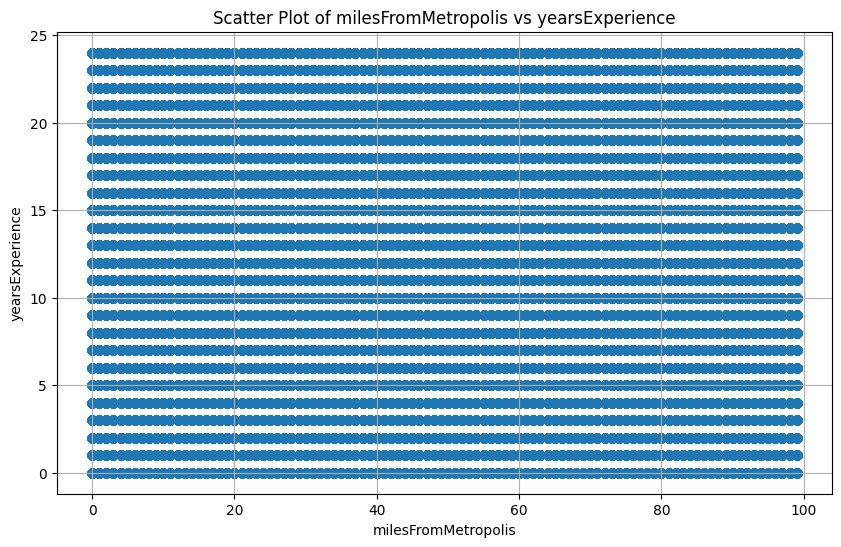

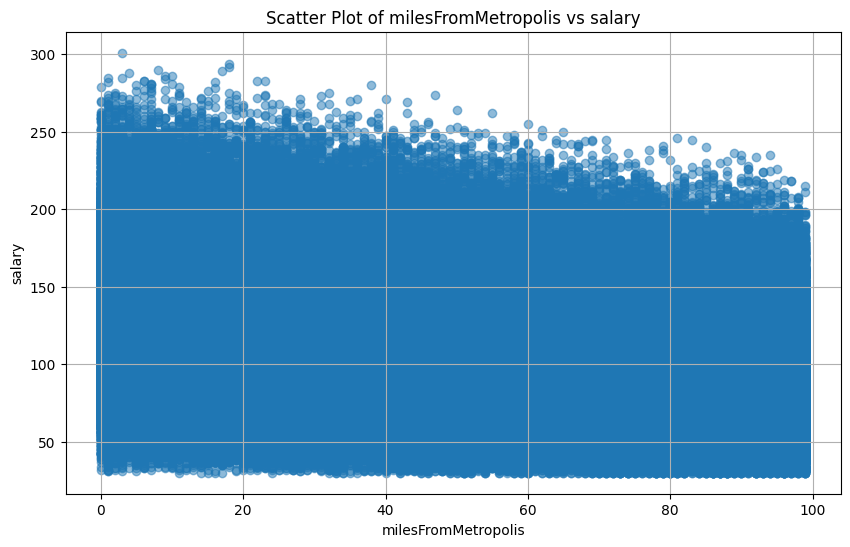

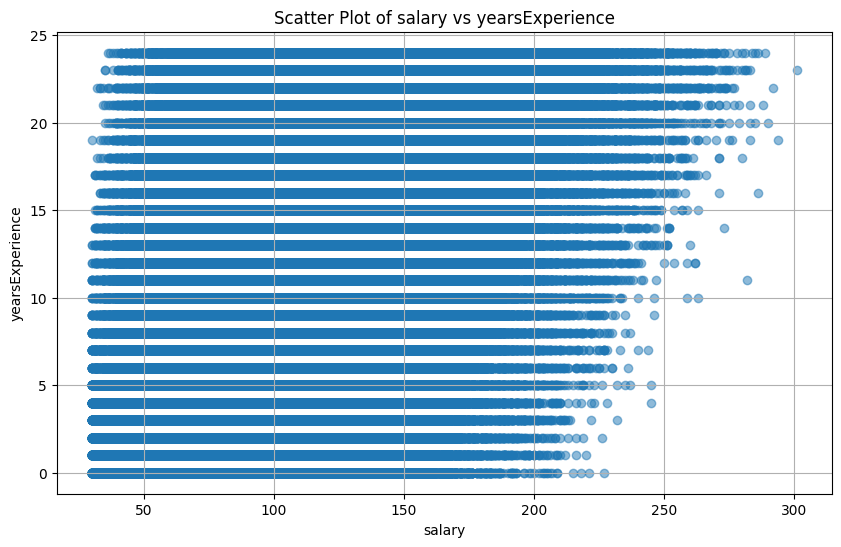

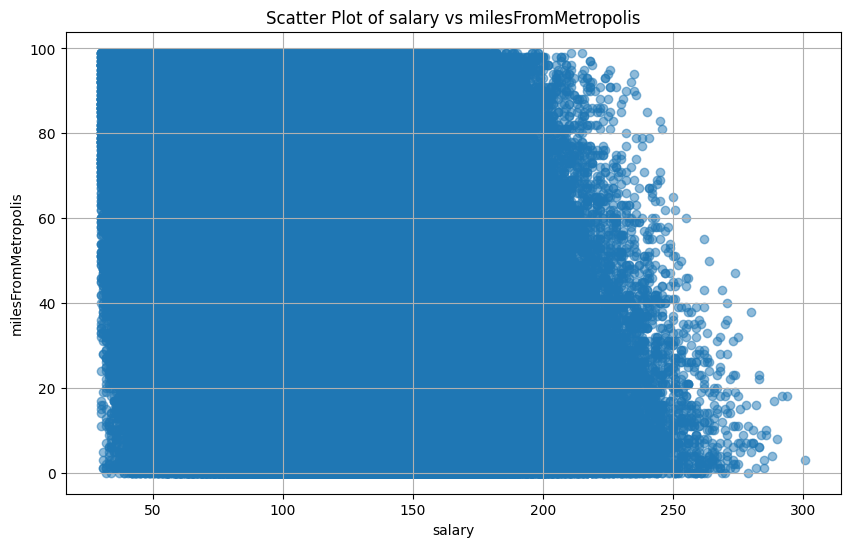

In [ ]:
import matplotlib.pyplot as plt

# Define function to plot scatterplot
def plot_scatter(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(train_data[x], train_data[y], alpha=0.5)
    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

# Example var_list, replace with actual numeric column names
var_list = ['yearsExperience', 'milesFromMetropolis', 'salary']  # Replace with actual numeric columns

# Loop through the different columns and plot scatterplots
for i in var_list:
    for j in var_list:
        if i != j:
            plot_scatter(i, j)


From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


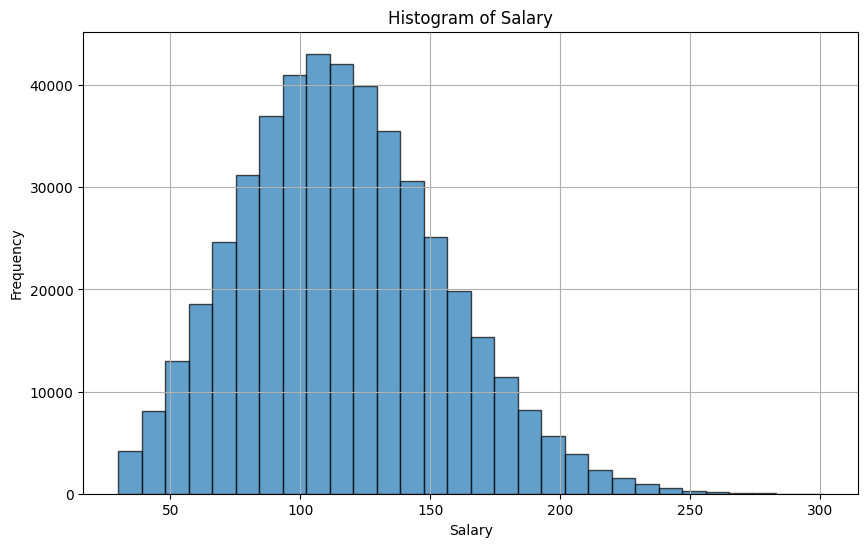

In [ ]:
import matplotlib.pyplot as plt

# Sample Data
data = train_data['salary']  # Replace with your data column

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)  # Adjust bins as needed
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f199cf2e490>,
      dtype=object)

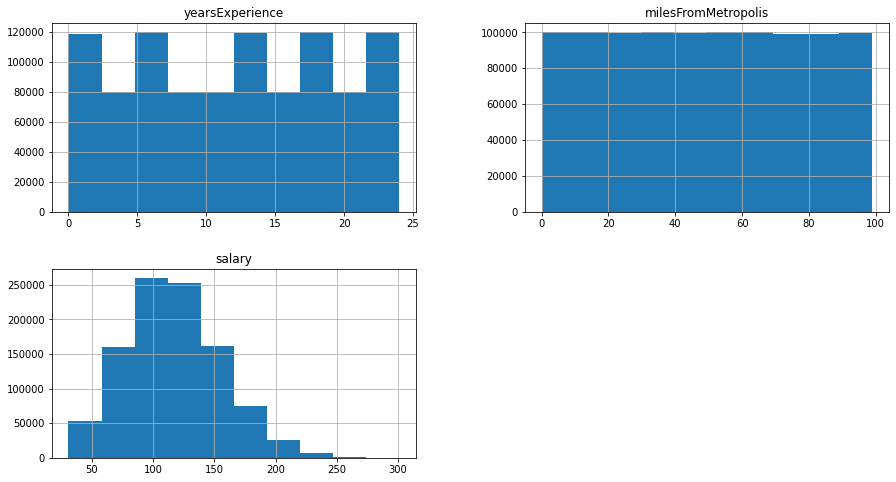

In [ ]:
# Define columns to plot
columns_to_plot = ['salary', 'yearsExperience', 'milesFromMetropolis']

# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Loop through each column and create a subplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, i-th subplot
    plt.hist(train_data[column], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


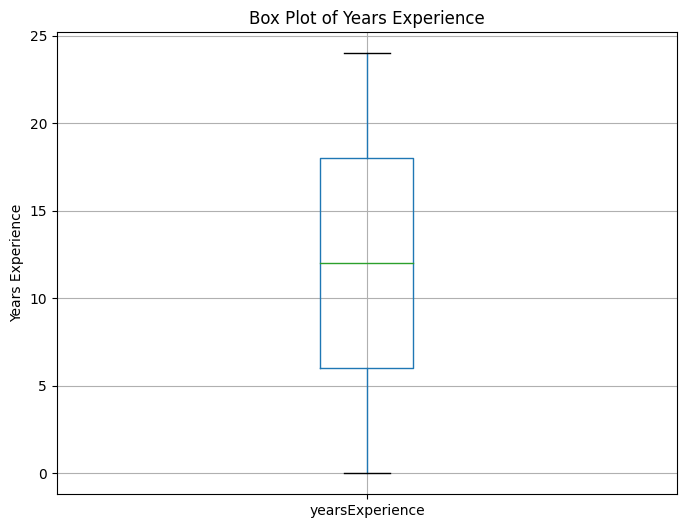

In [ ]:
# Create a box plot for the 'yearsExperience' column
plt.figure(figsize=(8, 6))
train_data.boxplot(column='yearsExperience')
plt.title('Box Plot of Years Experience')
plt.ylabel('Years Experience')
plt.grid(True)
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

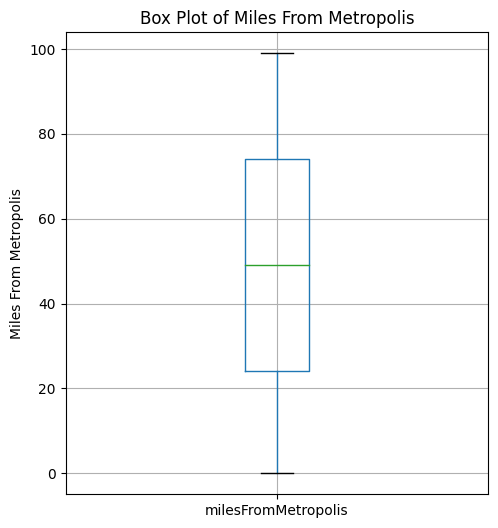

In [ ]:
# Create box plot for 'milesFromMetropolis'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
train_data.boxplot(column='milesFromMetropolis')
plt.title('Box Plot of Miles From Metropolis')
plt.ylabel('Miles From Metropolis')
plt.grid(True)

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

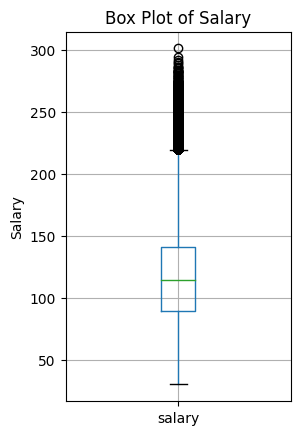

In [ ]:
# Create box plot for 'salary'
plt.subplot(1, 2, 2)
train_data.boxplot(column='salary')
plt.title('Box Plot of Salary')
plt.ylabel('Salary')
plt.grid(True)

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120


## Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

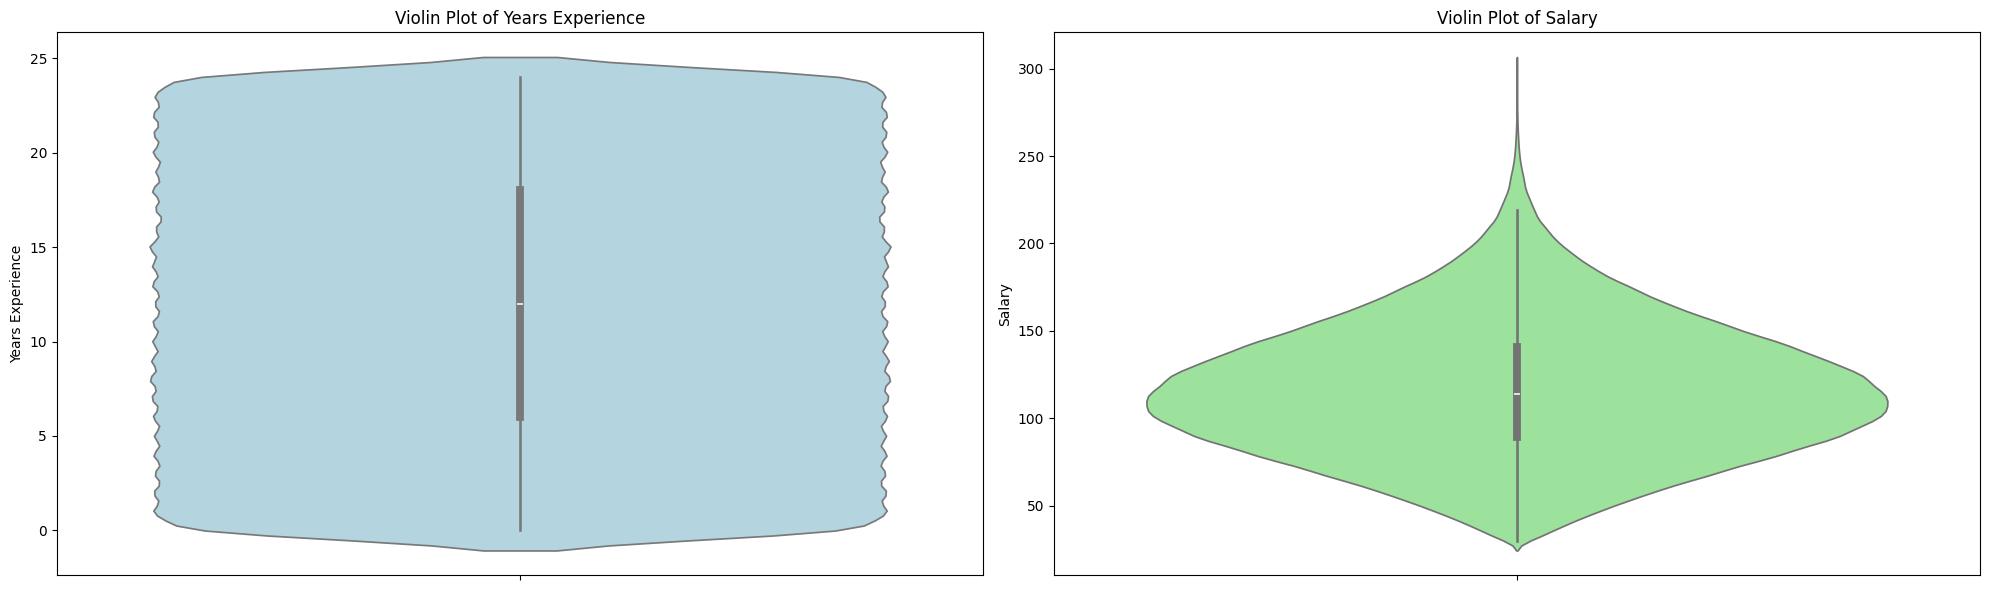

In [ ]:
# Set up the figure
plt.figure(figsize=(20, 6))

# Create a violin plot for 'yearsExperience'
plt.subplot(1, 2, 1)
sns.violinplot(data=train_data, y='yearsExperience', color='lightblue')
plt.title('Violin Plot of Years Experience')
plt.ylabel('Years Experience')

# Create a violin plot for 'salary'
plt.subplot(1, 2, 2)
sns.violinplot(data=train_data, y='salary', color='lightgreen')
plt.title('Violin Plot of Salary')
plt.ylabel('Salary')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

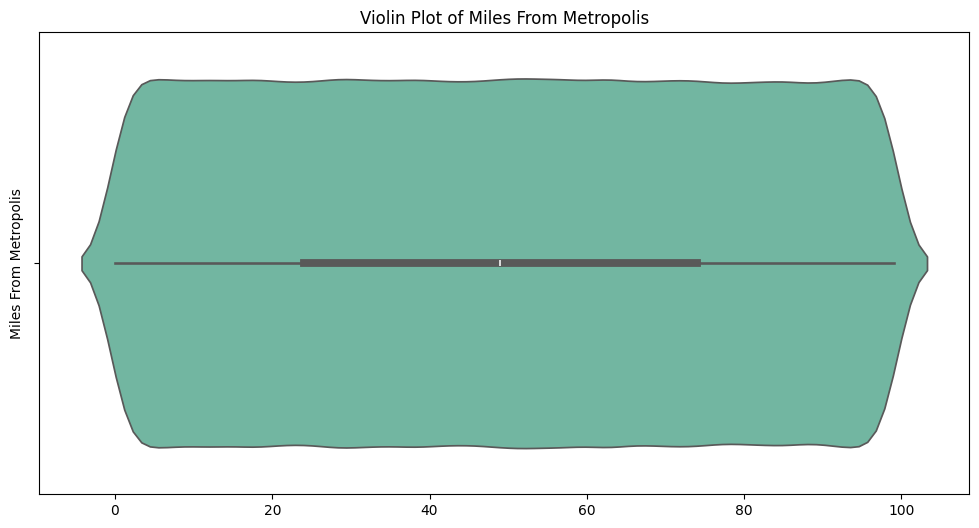

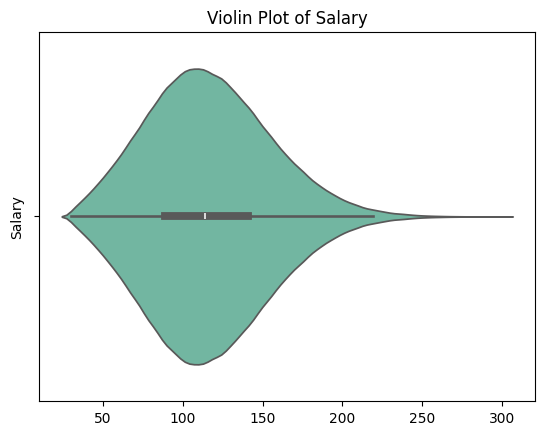

In [ ]:
plt.figure(figsize=(12, 6))

# Create a violin plot for milesFromMetropolis
sns.violinplot(x='milesFromMetropolis', data=train_data, palette='Set2')

# Add title and labels
plt.title('Violin Plot of Miles From Metropolis')
plt.ylabel('Miles From Metropolis')
plt.xlabel('')

# Display the plot
plt.show()
sns.violinplot(x='salary', data=train_data, palette='Set2')

# Add title and labels
plt.title('Violin Plot of Salary')
plt.ylabel('Salary')
plt.xlabel('')

# Display the plot
plt.show()

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.


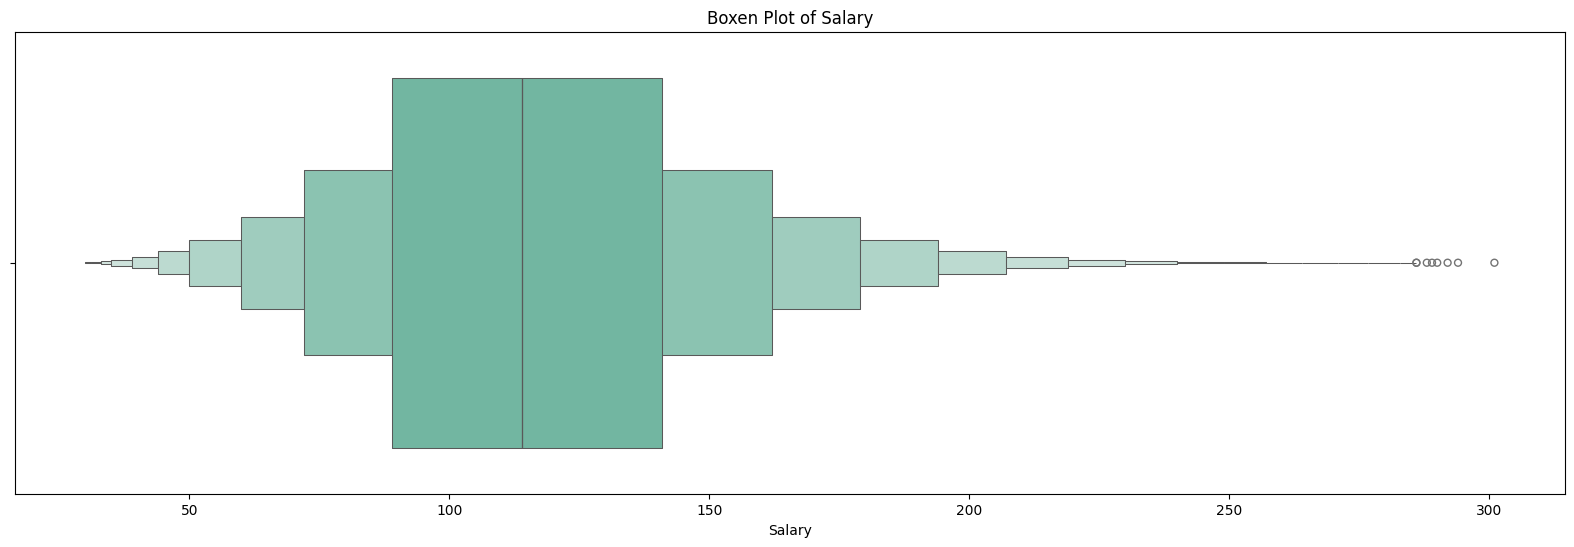

In [ ]:
# Set up the figure
plt.figure(figsize=(20, 6))

# Create a boxen plot for salary
sns.boxenplot(x='salary', data=train_data, palette='Set2')

# Add title and labels
plt.title('Boxen Plot of Salary')
plt.xlabel('Salary')
plt.ylabel('')

# Display the plot
plt.show()

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


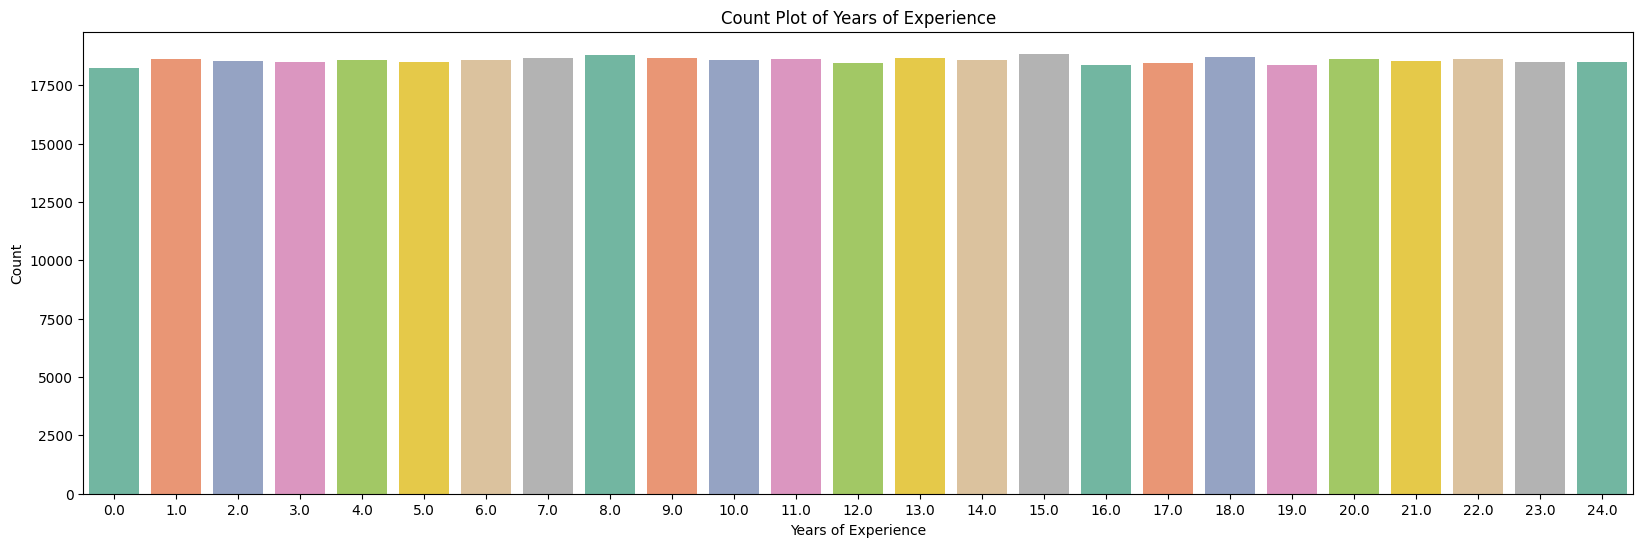

In [ ]:
# Set up the figure
plt.figure(figsize=(20, 6))

# Create a count plot for yearsExperience
sns.countplot(x='yearsExperience', data=train_data, palette='Set2')

# Add title and labels
plt.title('Count Plot of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Count')

# Display the plot
plt.show()

From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

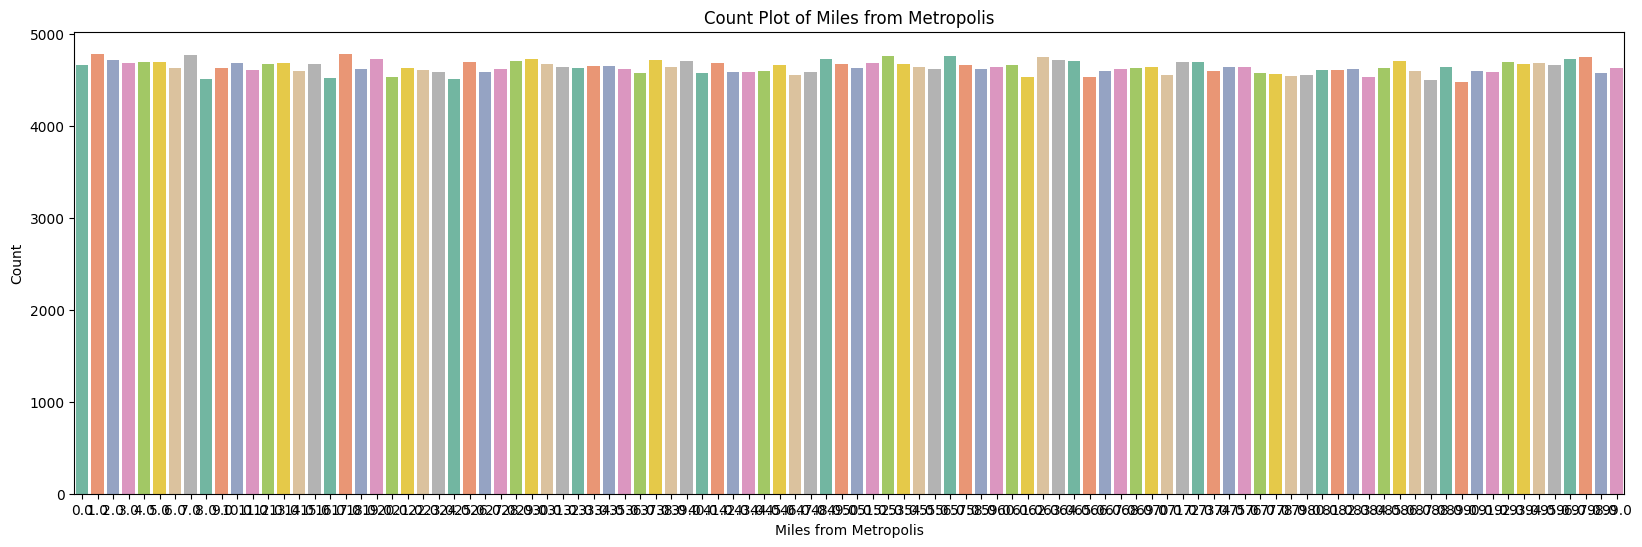

In [ ]:
# Set up the figure
plt.figure(figsize=(20, 6))

# Create a count plot for milesFromMetropolis
sns.countplot(x='milesFromMetropolis', data=train_data, palette='Set2')

# Add title and labels
plt.title('Count Plot of Miles from Metropolis')
plt.xlabel('Miles from Metropolis')
plt.ylabel('Count')

# Display the plot
plt.show()

From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

## Subset of train dataset

ploting process of swarm plot was taking huge time because of large dataset.

So, we take a subset of 50000 samples from train datset and plot it for interpretation.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


plot data on 50000 of 1000000 sample for clear visualization.

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

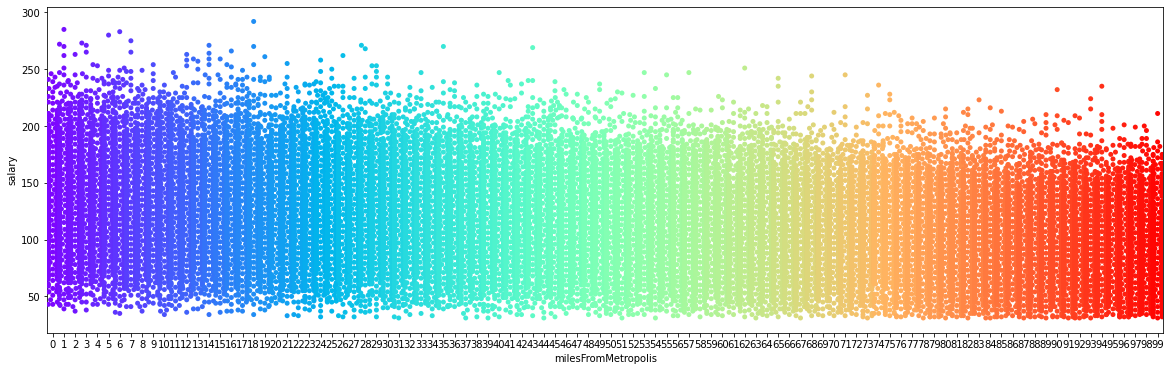

In [ ]:
# Set up the figure
plt.figure(figsize=(20, 6))

# Create a swarm plot for milesFromMetropolis vs salary
sns.swarmplot(x='milesFromMetropolis', y='salary', data=train_data, palette='Set2')

# Add title and labels
plt.title('Swarm Plot of Miles from Metropolis vs Salary')
plt.xlabel('Miles from Metropolis')
plt.ylabel('Salary')

# Display the plot
plt.show()

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

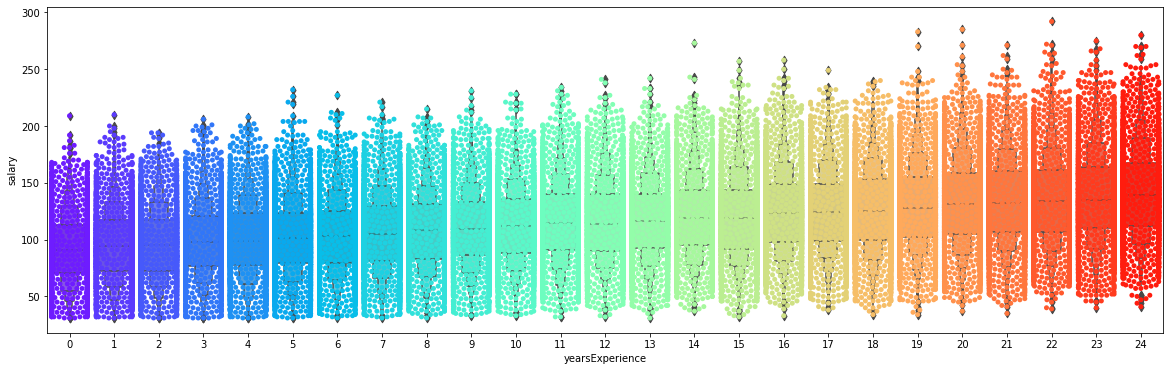

In [ ]:
# Set up the figure
plt.figure(figsize=(20, 6))

# Create a boxen plot
sns.boxenplot(x='yearsExperience', y='salary', data=train_data, palette='Set2', alpha=0.5)

# Overlay a swarm plot on the same figure
sns.swarmplot(x='yearsExperience', y='salary', data=train_data, palette='Set1', color='black', alpha=0.6)

# Add title and labels
plt.title('Combined Boxen and Swarm Plot of Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Display the plot
plt.show()

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

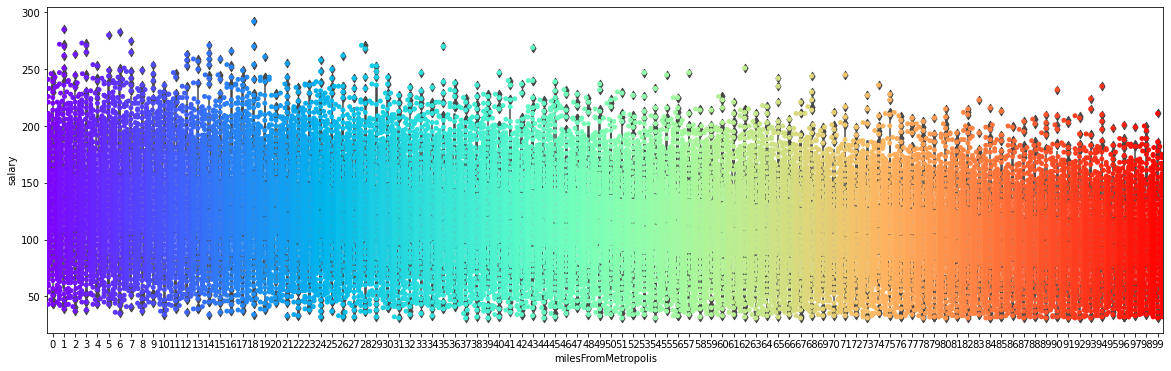

In [ ]:
# Set up the figure
plt.figure(figsize=(20, 6))

# Create a boxen plot
sns.boxenplot(x='milesFromMetropolis', y='salary', data=train_data, palette='Set2', alpha=0.5)

# Overlay a swarm plot on the same figure
sns.swarmplot(x='milesFromMetropolis', y='salary', data=train_data, palette='Set1', color='black', alpha=0.6)

# Add title and labels
plt.title('Combined Boxen and Swarm Plot of Miles from Metropolis vs Salary')
plt.xlabel('Miles from Metropolis')
plt.ylabel('Salary')

# Display the plot
plt.show()

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets).

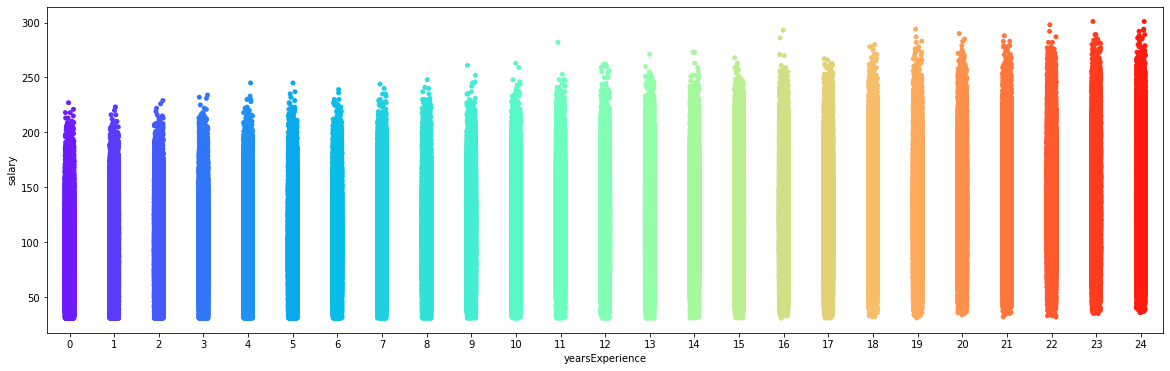

In [ ]:
# Set up the figure
plt.figure(figsize=(20, 6))

# Create a strip plot
sns.stripplot(x='yearsExperience', y='salary', data=train_data, palette='Set1', jitter=True, alpha=0.6)

# Add title and labels
plt.title('Strip Plot of Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Display the plot
plt.show()

from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

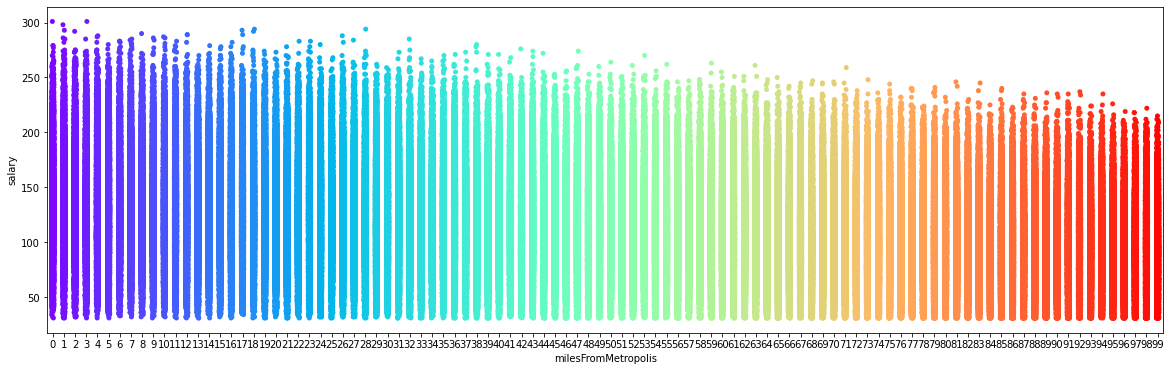

In [ ]:
plt.figure(figsize=(20, 6))

# Create a strip plot
sns.stripplot(x='milesFromMetropolis', y='salary', data=train_data, palette='Set1', jitter=True, alpha=0.6)

# Add title and labels
plt.title('Strip Plot of Miles from Metropolis vs Salary')
plt.xlabel('Miles from Metropolis')
plt.ylabel('Salary')

# Display the plot
plt.show()

from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model.
2. It is used for diagnosing collinearity/multicollinearity.
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [ ]:
# import statsmodle library for vif
import statsmodels.api as sm

In [ ]:
# Define the numerical columns based on the output provided
numerical_columns = ['yearsExperience', 'milesFromMetropolis', 'salary']

# Create a DataFrame with only the numerical values
train_for_vif = train_data[numerical_columns]

# Drop rows with missing values
train_for_vif.dropna(inplace=True)

# Define the target values
target = train_for_vif['salary']

# Drop the target column from the features DataFrame
train_for_vif = train_for_vif.drop(columns=['salary'])

# Display the column names
names = train_for_vif.columns.tolist()
print(names)

['yearsExperience', 'milesFromMetropolis']


In [ ]:
# Calculating VIF for each feature
for i in range(len(names)):
    # Taking one column as target variable
    y = train_for_vif[names[i]]

    # Taking all other remaining columns as feature variables
    x = train_for_vif.drop(columns=[names[i]])

    # Adding a constant term to the feature variables matrix
    x = sm.add_constant(x)

    # Fitting the OLS model on y and x
    model = sm.OLS(y, x).fit()

    # Getting the R^2 value of results
    rsq = model.rsquared

    # Calculating VIF value
    vif = round(1 / (1 - rsq), 2)

    print(f"R Square value of {names[i]} column is {round(rsq, 2)} keeping all other columns as features")
    print(f"Variance Inflation Factor of {names[i]} column is {vif} \n")


R Square value of yearsExperience columns is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.22 

R Square value of milesFromMetropolis columns is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.22 



Observations:

there is colinearity/multicolinearity between
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

## ANOVA Test

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

### Homogeneity of variance Assumption Check

### Hypothesis Testing

According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:

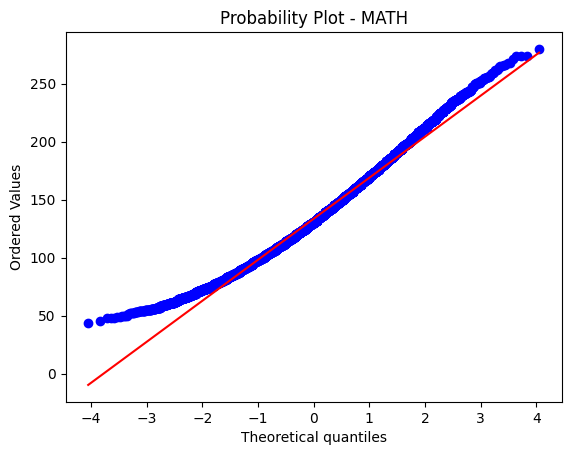

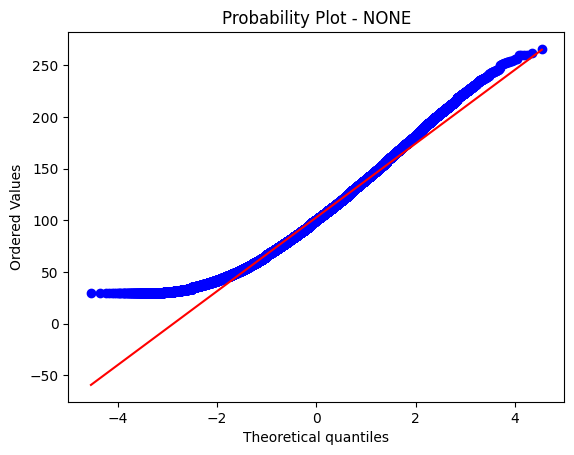

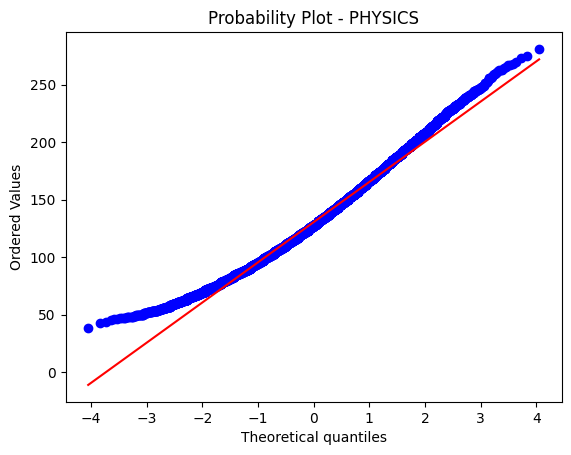

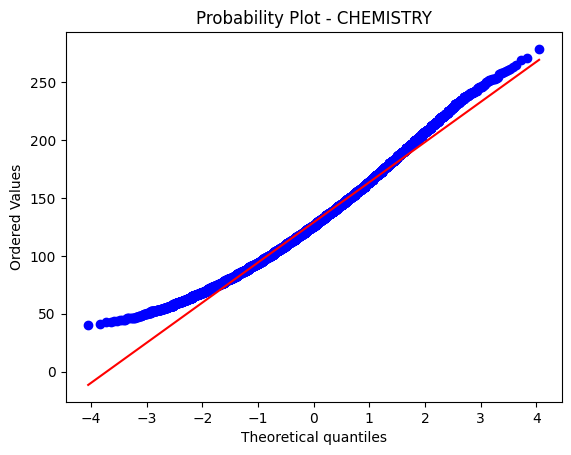

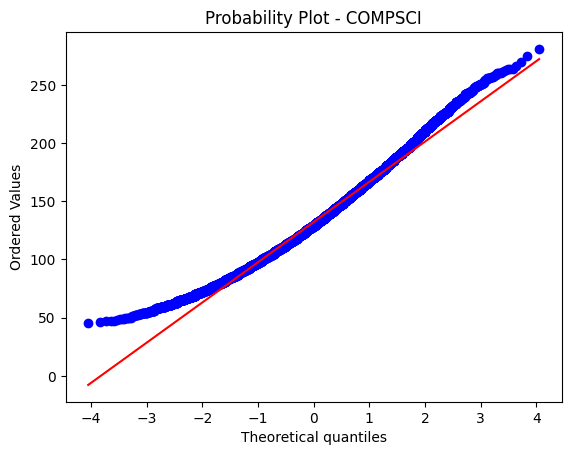

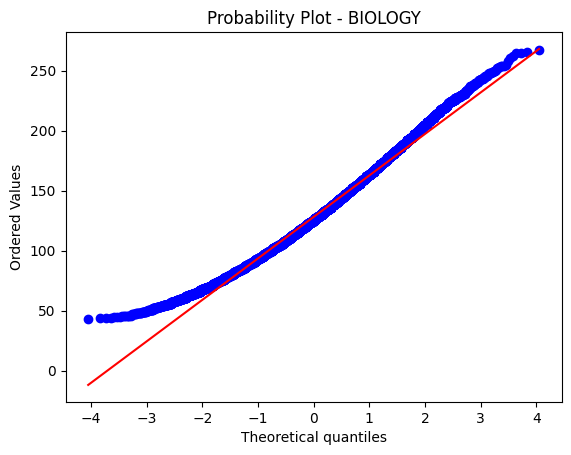

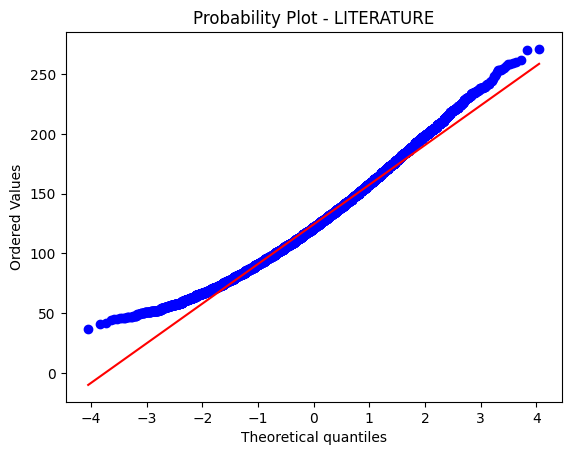

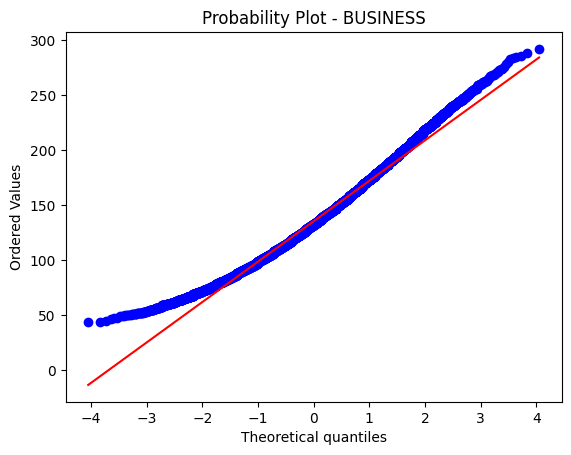

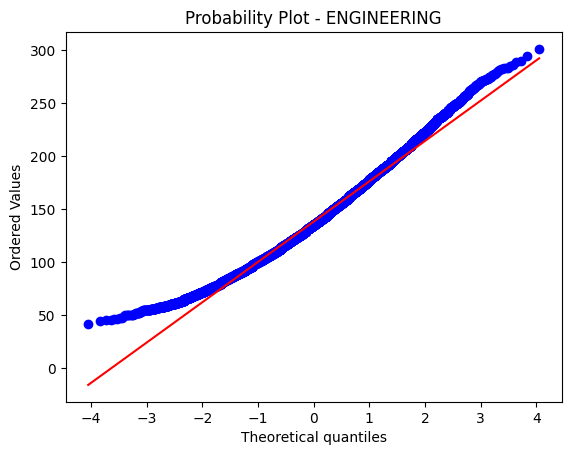

Ratio of the largest to the smallest sample standard deviation:  1.1464806916894732
                                   SS      df              MS            F  \
Source of Variation                                                          
Between Groups        97460442.233358       8  12182555.27917  9519.923402   
Within Groups        594164125.569176  464303     1279.690473                
Total                691624567.802534  464311     1489.571791                

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.191845  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 9519.923402251563 and p-value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing i

In [ ]:
def perform_anova_test(x, y):
    # Create DataFrame with the variables of interest
    train_anova = train_data[[x, y]].dropna()

    # Create groups based on the categorical variable
    groups = train_anova.groupby(x)[y].apply(list)

    # Plot probability plots for each group
    unique_groups = train_anova[x].unique()
    for group in unique_groups:
        stats.probplot(train_anova[train_anova[x] == group][y], dist="norm", plot=plt)
        plt.title("Probability Plot - " + str(group))
        plt.show()

    # Calculate ratio of the largest to the smallest sample standard deviation
    ratio = train_anova.groupby(x)[y].std().max() / train_anova.groupby(x)[y].std().min()
    print("Ratio of the largest to the smallest sample standard deviation: ", ratio)

    # Create ANOVA backbone table
    data = [['Between Groups', '', '', '', '', '', ''],
            ['Within Groups', '', '', '', '', '', ''],
            ['Total', '', '', '', '', '', '']]
    anova_table = pd.DataFrame(data, columns=['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])
    anova_table.set_index('Source of Variation', inplace=True)

    # Calculate SSTR and update anova table
    x_bar = train_anova[y].mean()
    SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar) ** 2
    anova_table['SS']['Between Groups'] = SSTR[y].sum()

    # Calculate SSE and update anova table
    SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std() ** 2
    anova_table['SS']['Within Groups'] = SSE[y].sum()

    # Calculate total sum of squares and update anova table
    SSTR_total = SSTR[y].sum() + SSE[y].sum()
    anova_table['SS']['Total'] = SSTR_total

    # Update degree of freedom
    anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
    anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
    anova_table['df']['Total'] = train_anova.shape[0] - 1

    # Calculate MS
    anova_table['MS'] = anova_table['SS'] / anova_table['df']

    # Calculate F
    F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
    anova_table['F']['Between Groups'] = F

    # Calculate p-value
    anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

    # Calculate F critical value
    alpha = 0.05
    tail_hypothesis_type = "two-tailed"
    if tail_hypothesis_type == "two-tailed":
        alpha /= 2
    anova_table['F crit']['Between Groups'] = stats.f.ppf(1 - alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

    # Print final ANOVA Table
    print(anova_table)

    # The p-value approach
    print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if anova_table['P-value']['Between Groups'] <= alpha:
        conclusion = "Null Hypothesis is rejected."
    print("F-score is:", anova_table['F']['Between Groups'], "and p-value is:", anova_table['P-value']['Between Groups'])
    print(conclusion)

    # The critical value approach
    print("\n--------------------------------------------------------------------------------------")
    print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
        conclusion = "Null Hypothesis is rejected."
    print("F-score is:", anova_table['F']['Between Groups'], "and critical value is:", anova_table['F crit']['Between Groups'])
    print(conclusion)

# Example usage
perform_anova_test('major', 'salary')


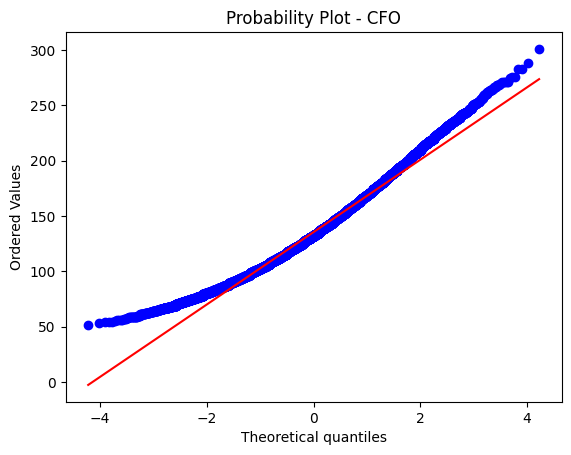

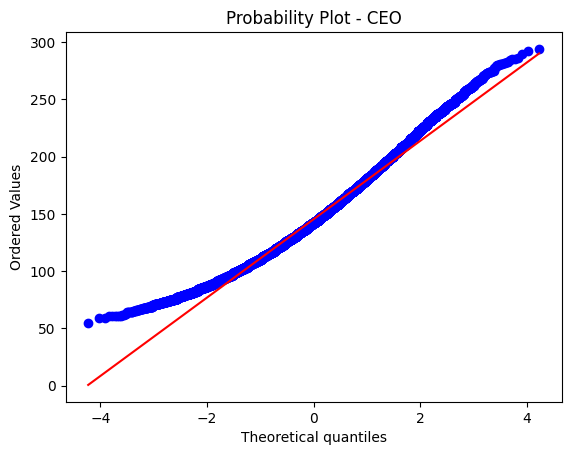

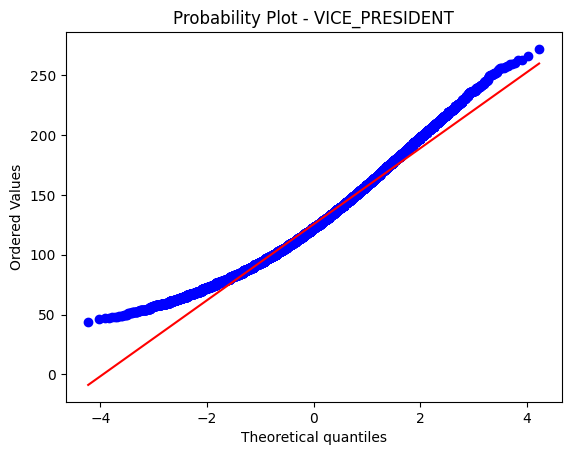

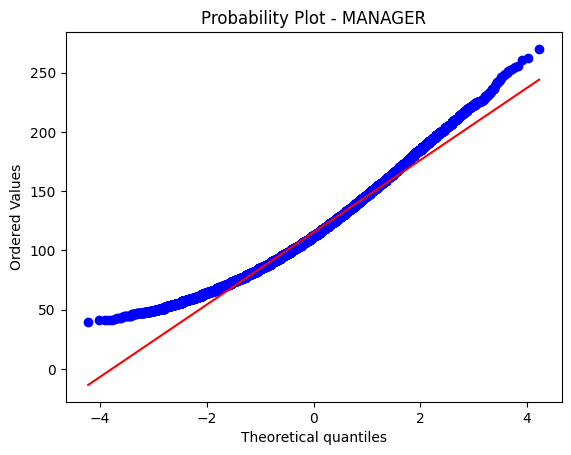

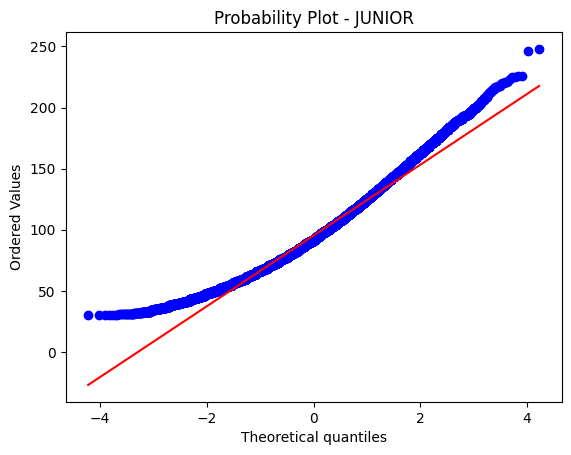

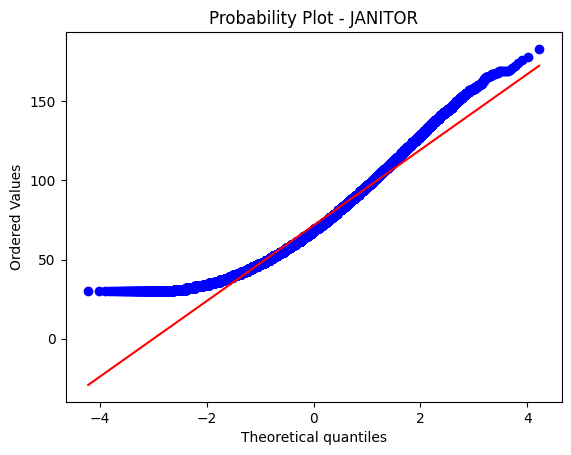

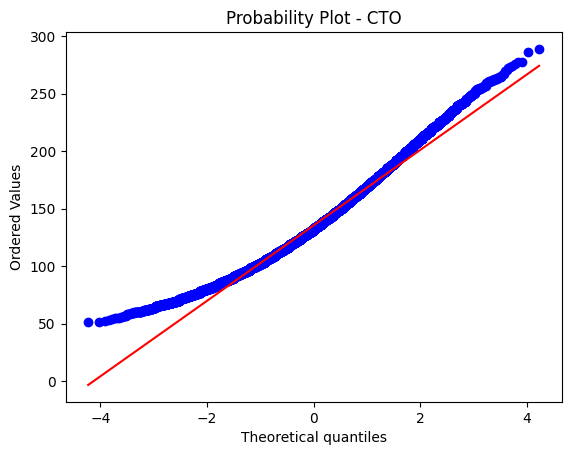

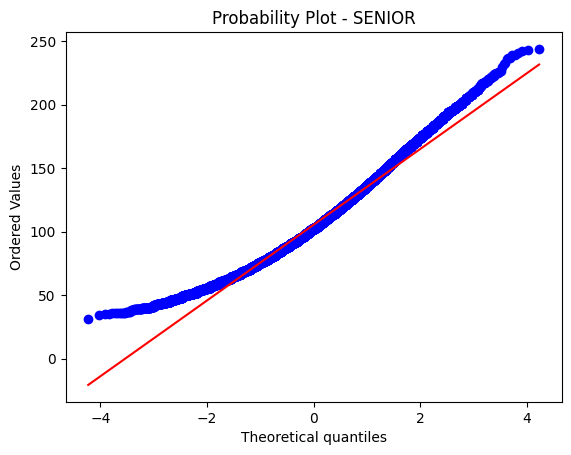

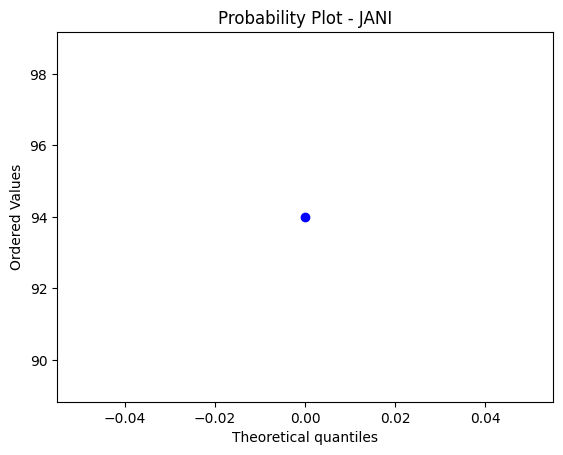

Ratio of the largest to the smallest sample standard deviation:  1.4203943110601065
                                   SS      df               MS             F  \
Source of Variation                                                            
Between Groups       243727845.006773       8  30465980.625847  31581.970302   
Within Groups        447897218.994989  464304        964.66371                 
Total                691625064.001762  464312      1489.569651                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.191845  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 31581.970301676167 and p-value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesi

In [ ]:
# perform anova test on jobType and salary
perform_anova_test('jobType', 'salary')



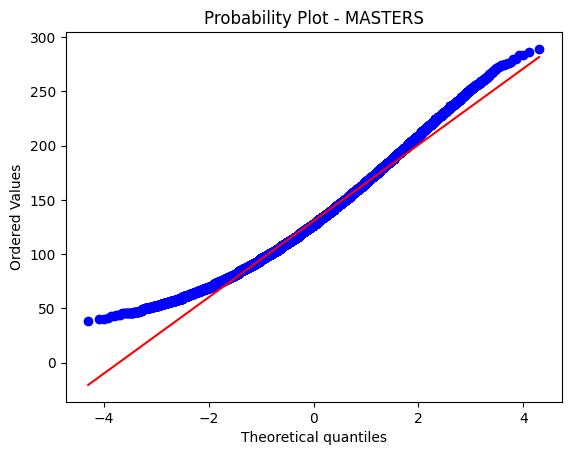

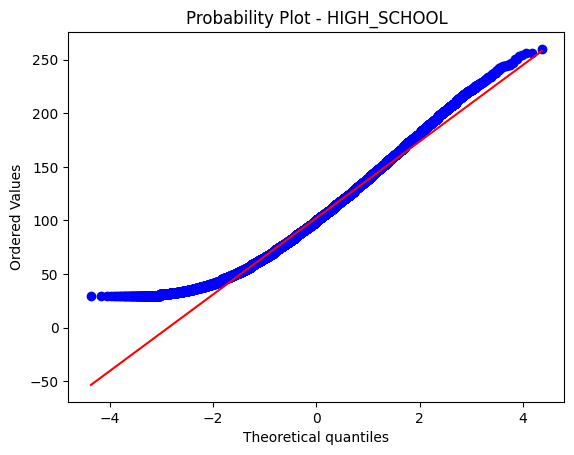

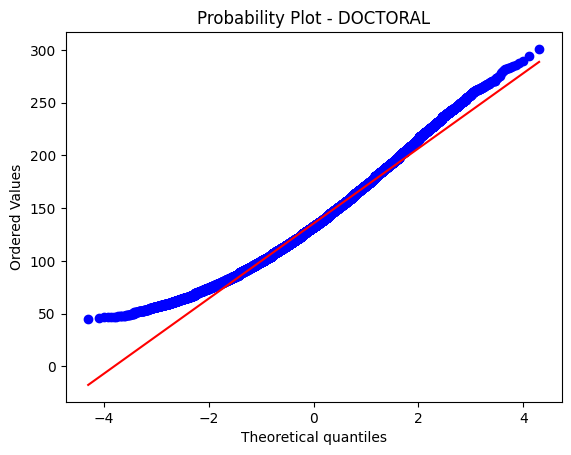

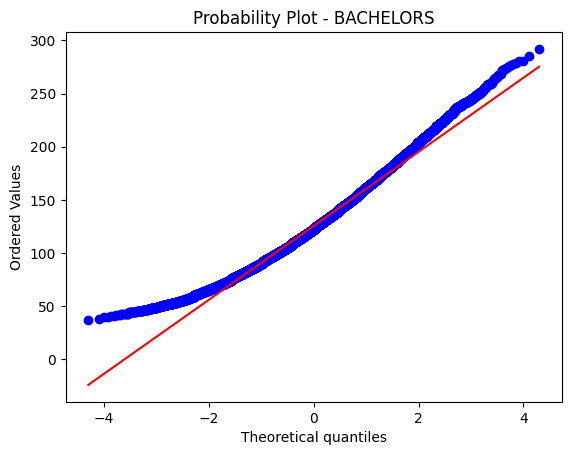

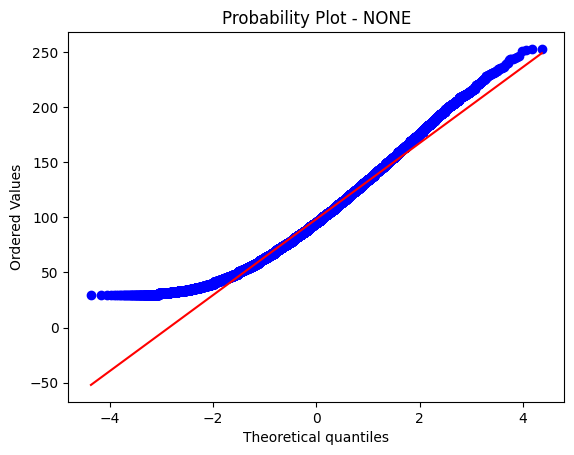

Ratio of the largest to the smallest sample standard deviation:  1.0328993896549439
                                   SS      df               MS             F  \
Source of Variation                                                            
Between Groups       109527727.367412       4  27381931.841853  21841.078227   
Within Groups        582096840.435113  464307      1253.689564                 
Total                691624567.802525  464311      1489.571791                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.785849  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 21841.078227107148 and p-value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesi

In [ ]:
# perform anova test on degree and salary

perform_anova_test('degree', 'salary')


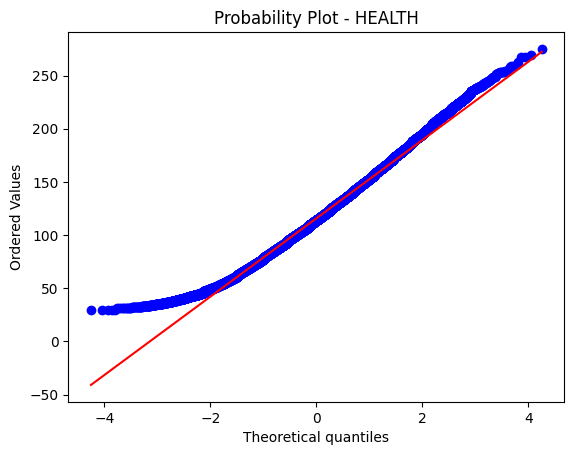

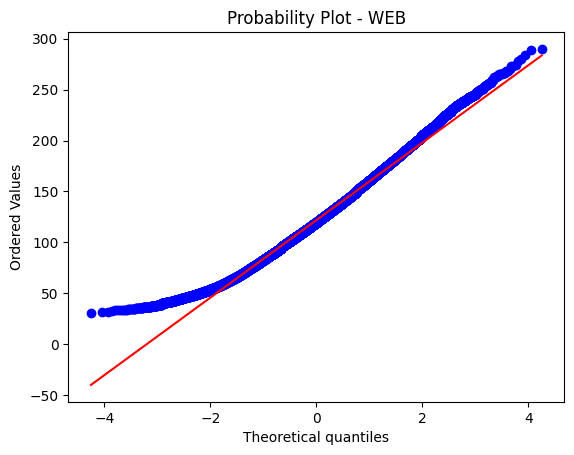

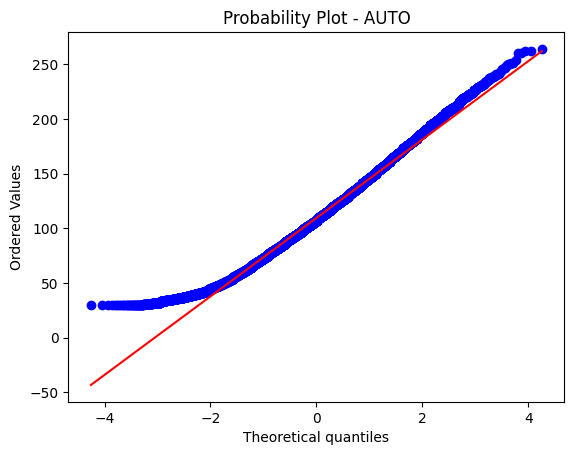

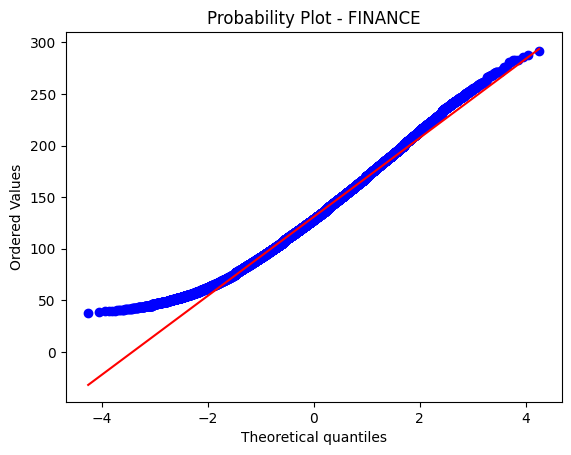

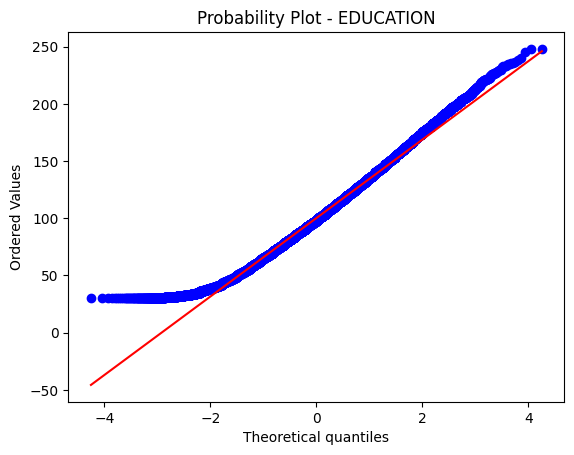

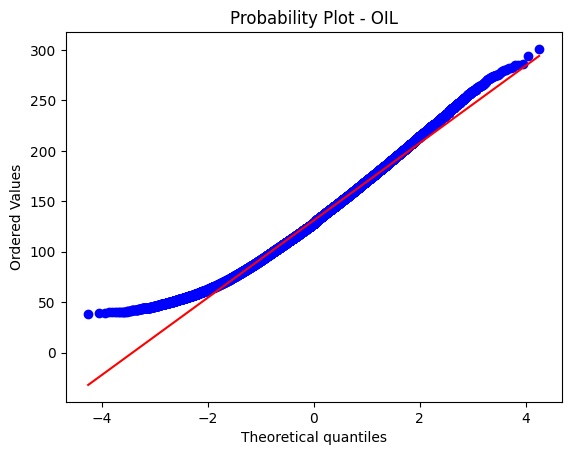

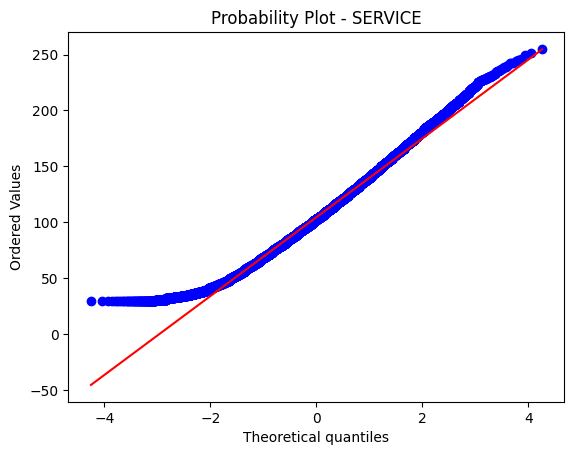

Ratio of the largest to the smallest sample standard deviation:  1.1158361651046598
                                   SS      df               MS            F  \
Source of Variation                                                           
Between Groups        60019163.560361       6  10003193.926727  7353.535807   
Within Groups        631605404.242164  464305      1360.324365                
Total                691624567.802524  464311      1489.571791                

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.408256  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 7353.53580725238 and p-value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testi

In [ ]:
# perform anova test on industry and salary

perform_anova_test('industry', 'salary')


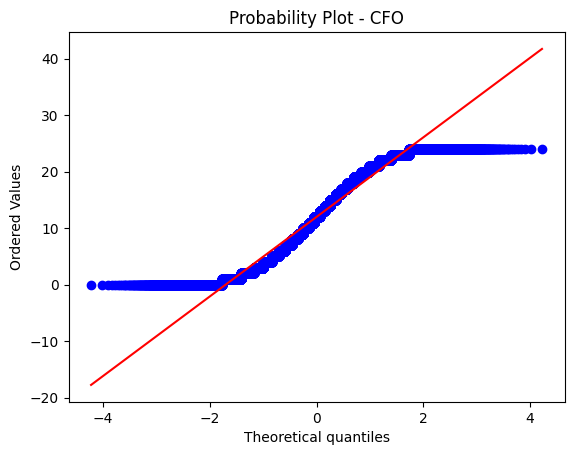

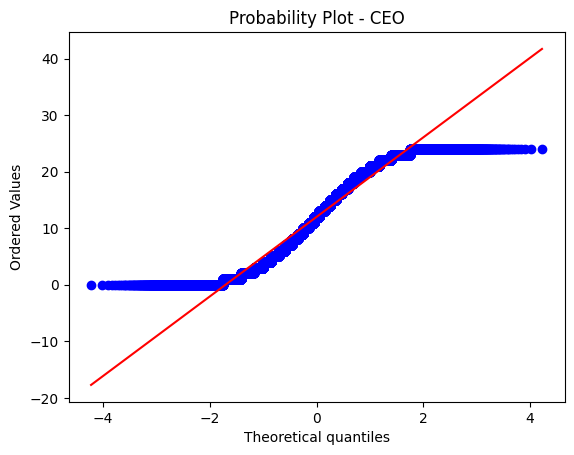

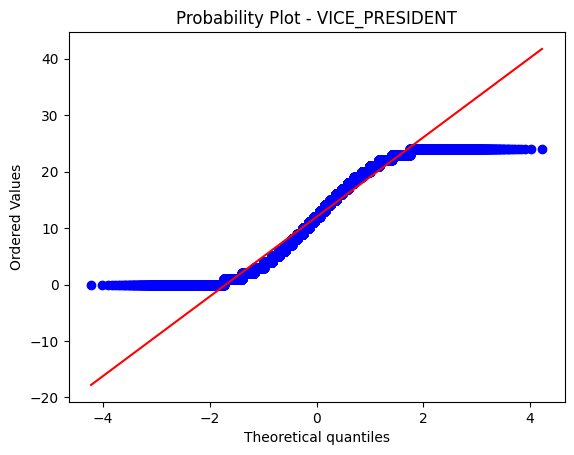

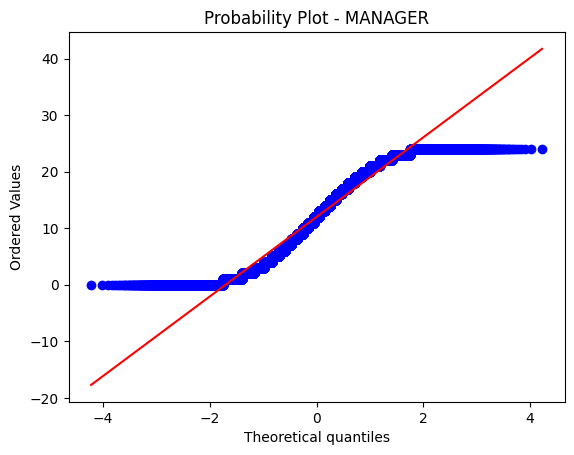

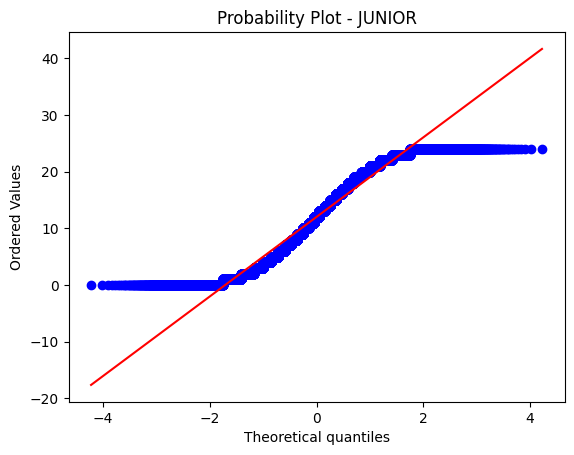

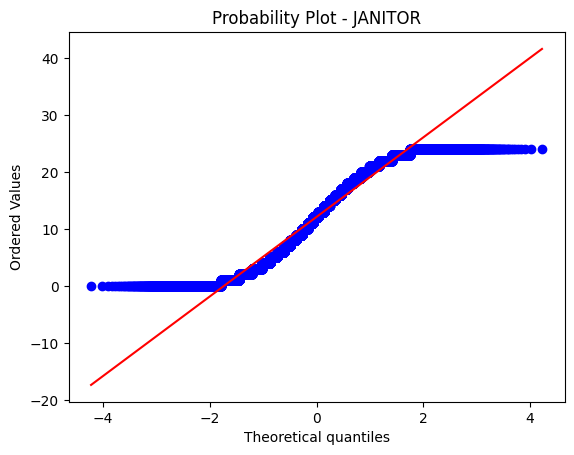

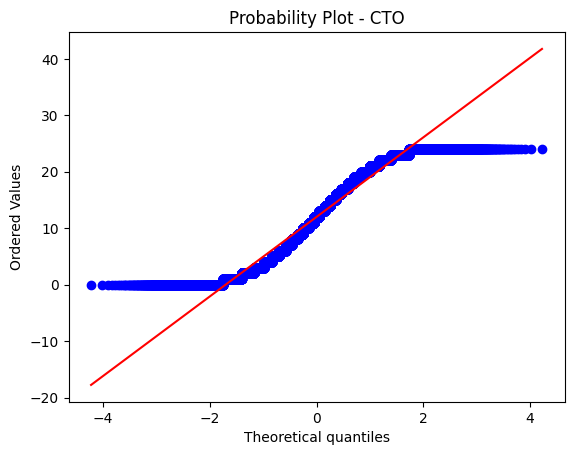

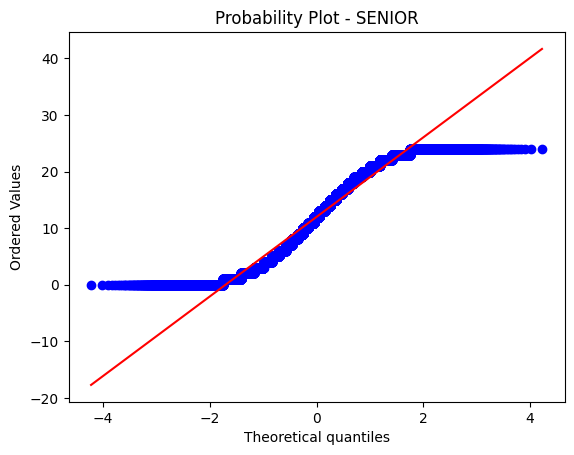

Ratio of the largest to the smallest sample standard deviation:  1.0094498956125157
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups            662.214267       7  94.602038  1.823764  0.078013   
Within Groups        24084317.668844  464304  51.871872                       
Total                24084979.883111  464311  51.872516                       

                       F crit  
Source of Variation            
Between Groups       2.287565  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.8237637160956115 and p-value is: 0.07801294075150633
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score 

In [ ]:
# perform anova test on jobType and yearsExperience
perform_anova_test('jobType', 'yearsExperience')

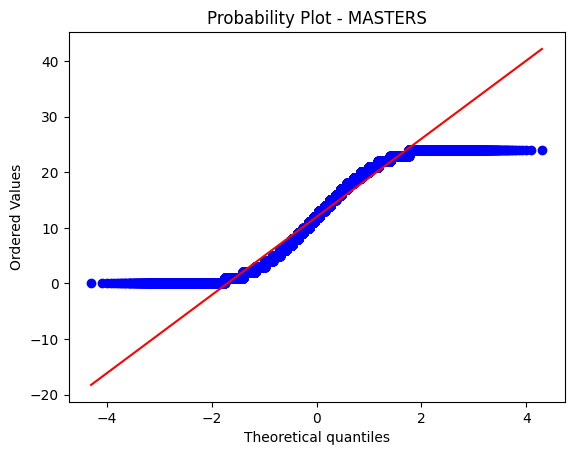

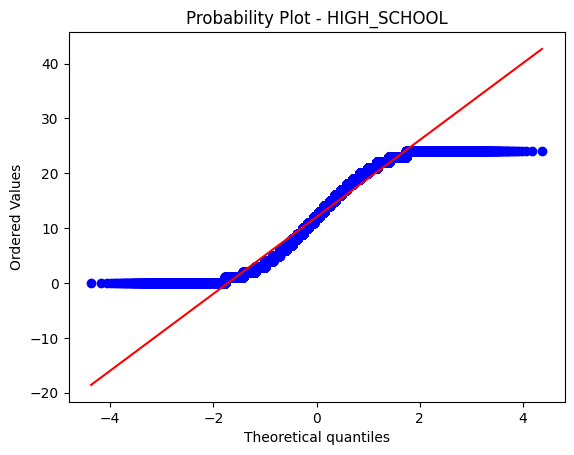

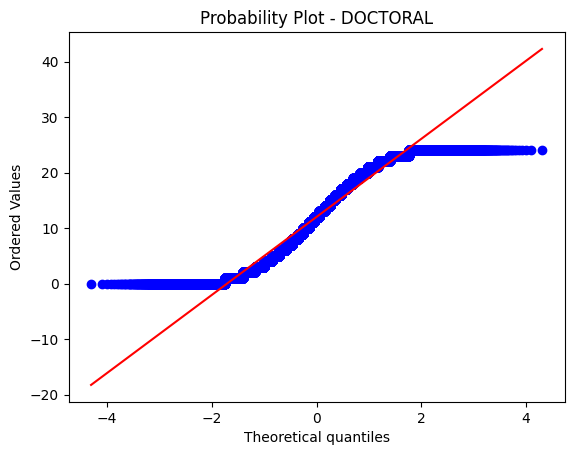

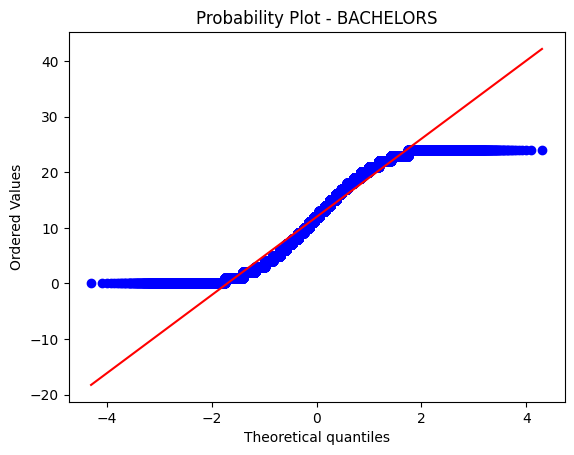

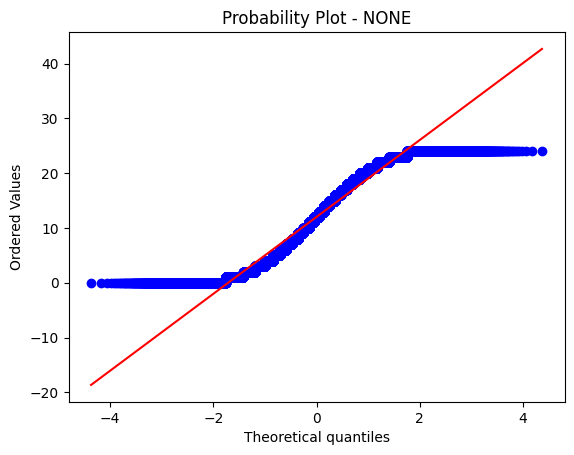

Ratio of the largest to the smallest sample standard deviation:  1.0034185557235922
                                  SS      df          MS         F   P-value  \
Source of Variation                                                            
Between Groups            421.550257       4  105.387564  2.031683  0.087047   
Within Groups        24084558.332854  464307   51.872055                       
Total                24084979.883111  464311   51.872516                       

                       F crit  
Source of Variation            
Between Groups       2.785849  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 2.031682836352356 and p-value is: 0.08704650669958458
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-sc

In [ ]:
# perform anova test on degree and yearsExperience
perform_anova_test('degree', 'yearsExperience')



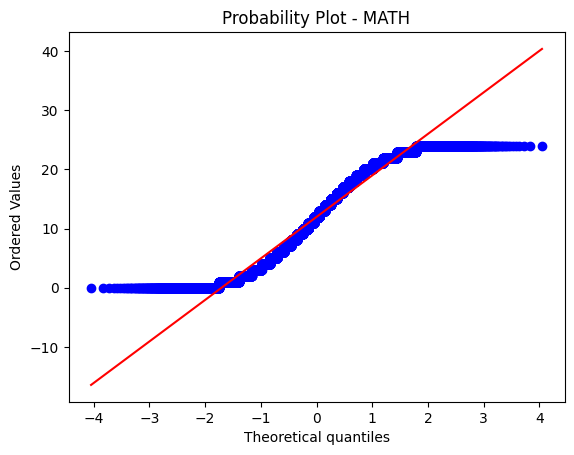

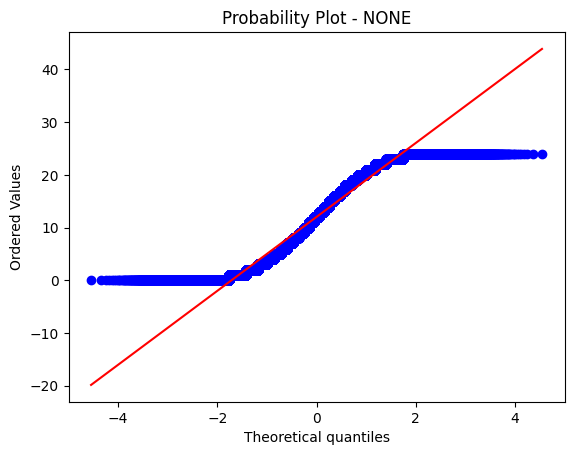

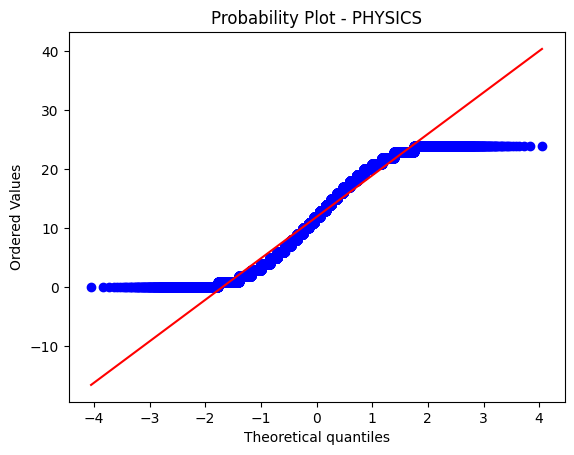

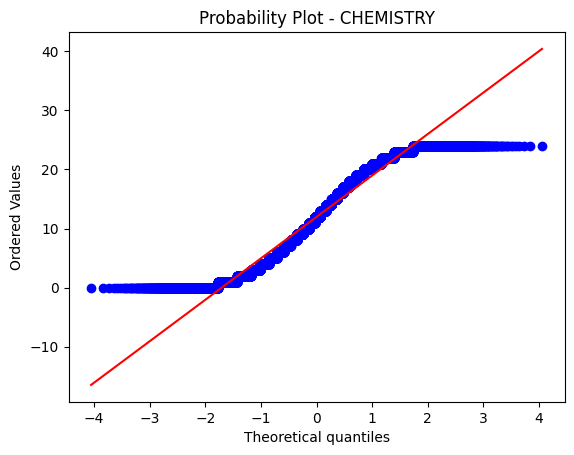

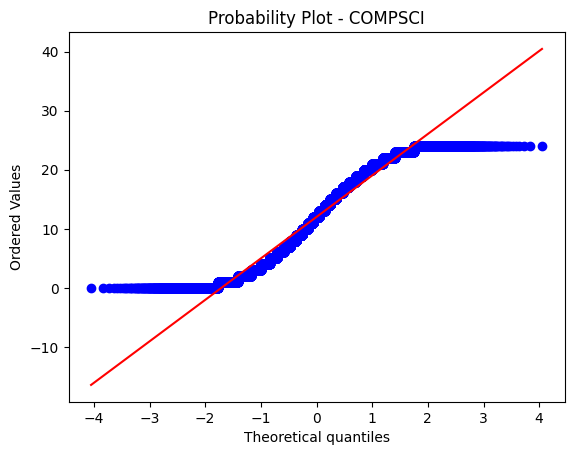

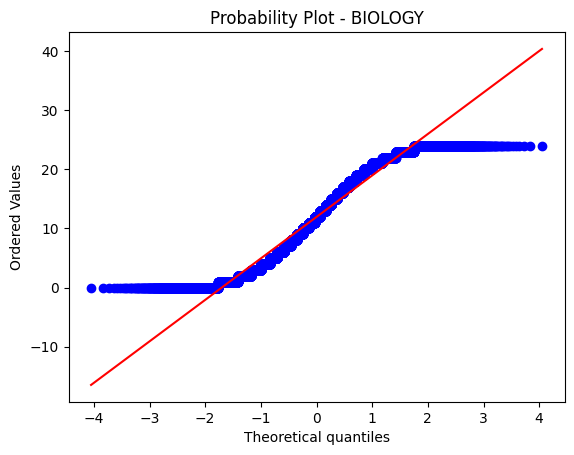

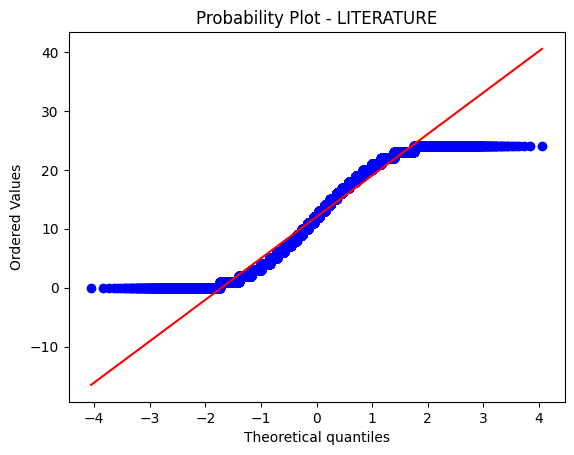

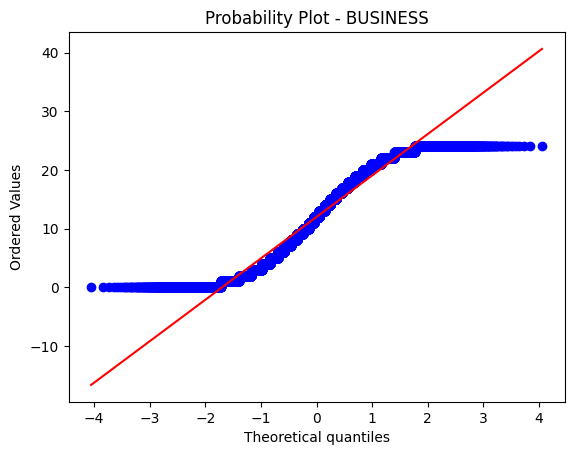

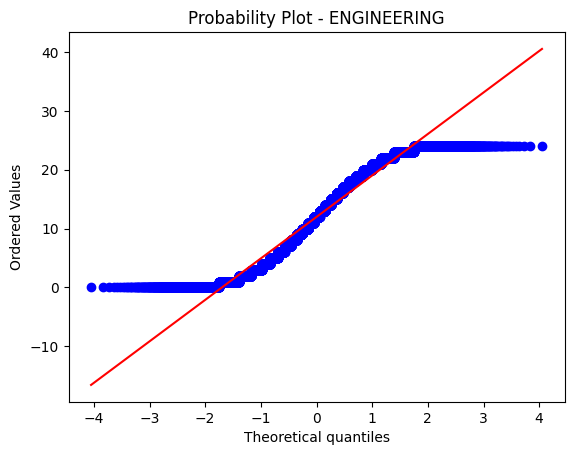

Ratio of the largest to the smallest sample standard deviation:  1.0080805839803624
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups            367.369281       8   45.92116  0.885268  0.527798   
Within Groups         24084612.51383  464303  51.872619                       
Total                24084979.883111  464311  51.872516                       

                       F crit  
Source of Variation            
Between Groups       2.191845  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.8852678203615183 and p-value is: 0.5277975201452776
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score i

In [ ]:
# perform anova test on major and yearsExperience
perform_anova_test('major', 'yearsExperience')



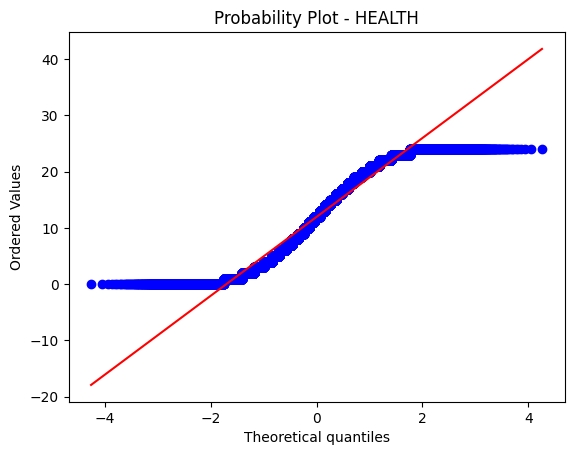

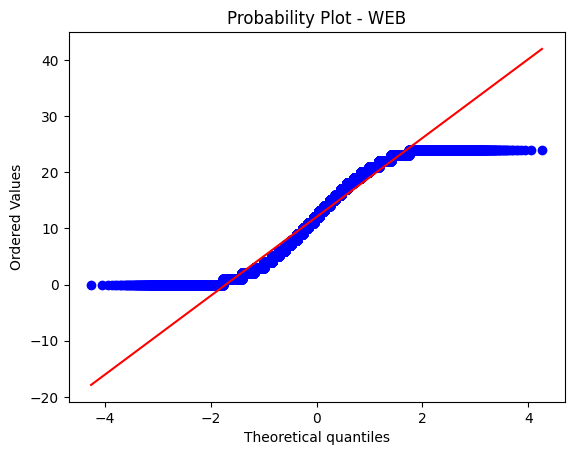

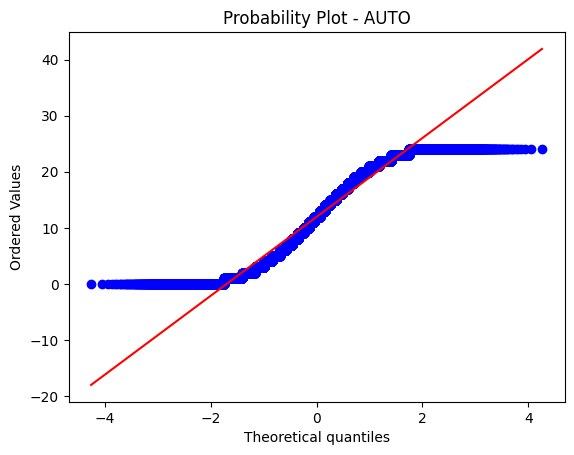

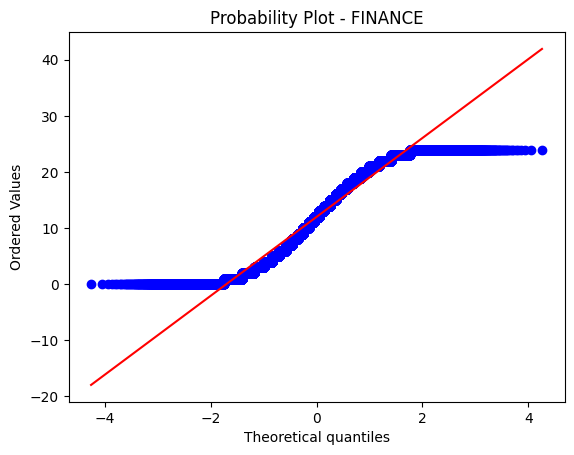

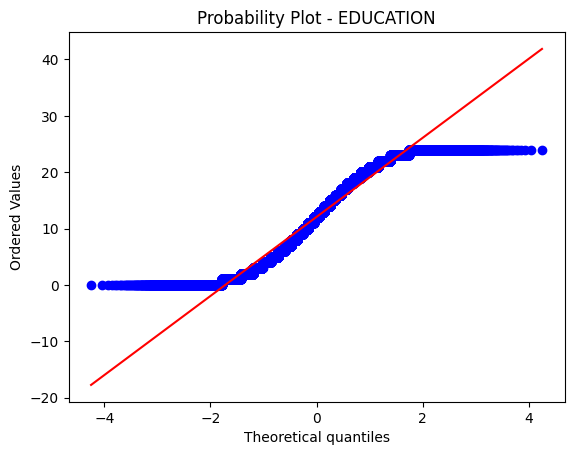

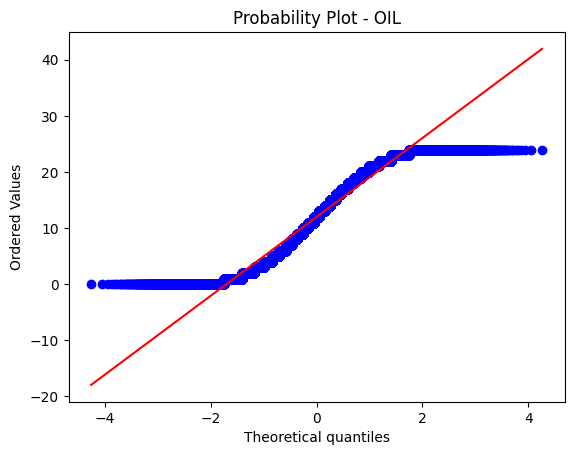

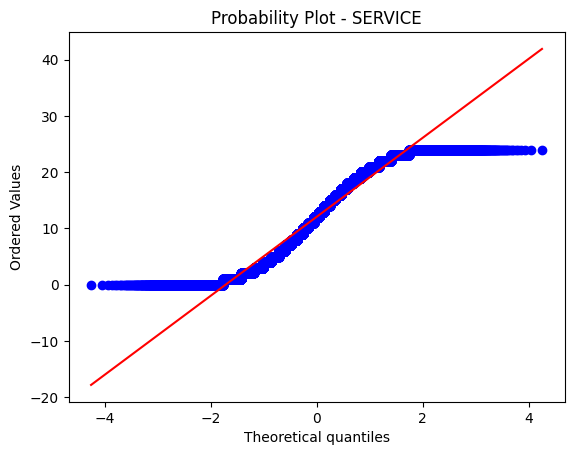

Ratio of the largest to the smallest sample standard deviation:  1.0058340582167615
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups            871.660979       6  145.27683  2.800716  0.010031   
Within Groups        24084108.222132  464305  51.871309                       
Total                24084979.883111  464311  51.872516                       

                       F crit  
Source of Variation            
Between Groups       2.408256  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 2.800716465028767 and p-value is: 0.010030951790186649
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 2.800

In [ ]:
# perform anova test on industry and yearsExperience
perform_anova_test('industry', 'yearsExperience')

## Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

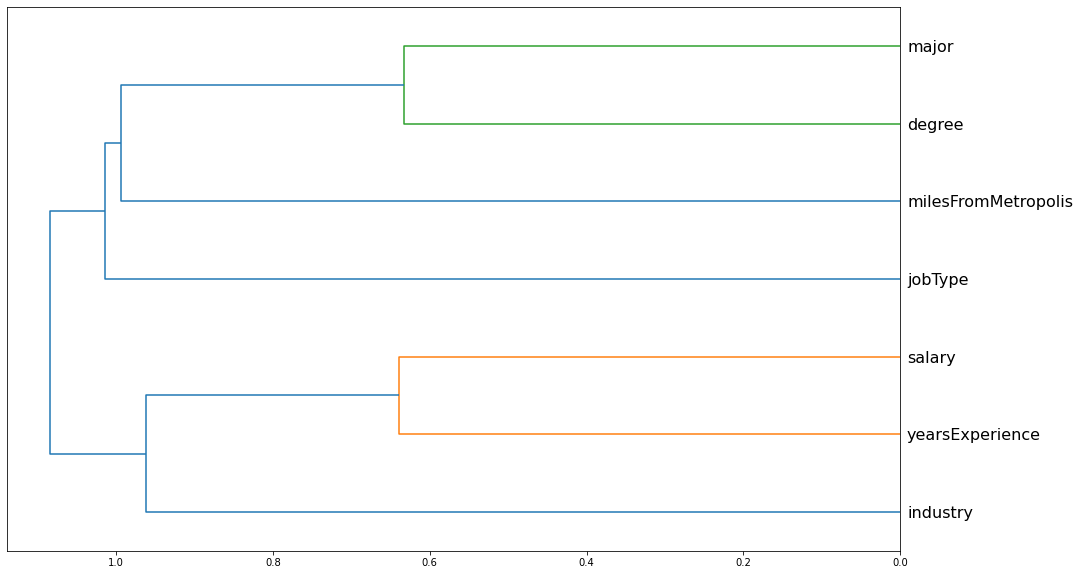

In [ ]:
import scipy
from scipy.cluster import hierarchy as hc
import matplotlib.pyplot as plt

# Step 1: Define or load your dataset
# Replace this with your actual dataset loading code
# For demonstration, let's create a random DataFrame
np.random.seed(1)
df = pd.DataFrame(np.random.rand(1000000, 10), columns=[f'feature_{i}' for i in range(10)])

# Step 2: Sample 50,000 rows from the dataset
df_sample = df.sample(n=50000, random_state=1)

# Step 3: Select numerical columns
X = df_sample.select_dtypes(include=[np.number])

# Step 4: Compute Spearman correlation matrix
corr = np.round(scipy.stats.spearmanr(X).correlation, 4)

# Step 5: Convert the correlation matrix to a distance matrix
corr_condensed = hc.distance.squareform(1 - corr)

# Step 6: Perform hierarchical clustering
z = hc.linkage(corr_condensed, method='average')

# Step 7: Plot the dendrogram
fig = plt.figure(figsize=(16, 10))
dendrogram = hc.dendrogram(z, labels=X.columns, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

## Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

## Scaling

### Why scaling is necessary?

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units.
* The results would vary greatly between different units, 5kg and 5000gms.
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(df, cols):
    scaler = MinMaxScaler()
    df[cols] = scaler.fit_transform(df[cols])
    return df

In [ ]:
# Making a list of the column names to be scaled
col_train = ['yearsExperience','milesFromMetropolis']

np.random.seed(0)
df = pd.DataFrame({
    'yearsExperience': np.random.rand(1000) * 10,  # Random data for yearsExperience
    'milesFromMetropolis': np.random.rand(1000) * 500  # Random data for milesFromMetropolis
})
# Apply scaling to the DataFrame
train_data = scale_data(df, col_train)



# Modelling

### One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [ ]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):

    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    # helper function to fit data
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    # helper function to transform data
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    # helper function to fit and transform data
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    # helper function to get new column names after fitting and tranforming data
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [ ]:
# Features
# Define the target and features with the correct column names
target_column = 'Salary'  # Ensure this matches exactly
feature_columns = ['JobType', 'Degree', 'Major', 'Industry']  # Ensure these match exactly

# Split into features and target
train_X = df[feature_columns]


jobType       degree      major industry
0             CFO      MASTERS       MATH   HEALTH
1             CEO  HIGH_SCHOOL       NONE      WEB
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE

In [ ]:
train_Y = df[target_column]

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# Initialize your custom OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # You can adjust parameters as needed

# Pass the features dataframe to the encoder
train_X_encoded = encoder.fit_transform(train_X)

# Create a DataFrame from the encoded features
encoded_columns = encoder.get_new_columns(train_X)
train_X_encoded_df = pd.DataFrame(train_X_encoded, columns=encoded_columns, index=train_X.index)

# Update the original train_X with encoded columns
train_X = train_X_encoded_df

# Display the updated train_X
print(train_X.head())

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         1.0         0.0             0.0            0.0   
1         1.0         0.0         0.0             0.0            0.0   
2         0.0         0.0         0.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            0.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             0.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    1.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    1.0              1.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           0.0                0.0   
2             1.0  ...           1.0           0.0                0.0   
3             1.0  ...           0.0           1.0                0.0   
4             0.0  ...           1.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          1.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          0.0              0.0          0.0   
4              1.0             0.0          0.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.416667             0.838384  
1         0.125000             0.737374  
2         0.416667             0.383838  
3         0.333333             0.171717  
4         0.333333             0.161616  

[5 rows x 31 columns]

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming train_X and train_Y are already defined
X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)

In [ ]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

def rmse(x, y):
    return np.sqrt(((x - y) ** 2).mean())
# Function for calculating all the relevant metrics
def print_score(model):
    # Predict on training and test data
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
     # Calculating metrics
    res = [
        rmse(Y_train_pred, Y_train),  # RMSE-Train
        rmse(Y_test_pred, Y_test),    # RMSE-Test
        model.score(X_train, Y_train),  # Score-Train
        model.score(X_test, Y_test),    # Score-Test
        median_absolute_error(Y_train, Y_train_pred),  # MedAE-Train
        median_absolute_error(Y_test, Y_test_pred),    # MedAE-Test
        mean_absolute_error(Y_train, Y_train_pred),    # MeanAE-Train
        mean_absolute_error(Y_test, Y_test_pred)      # MeanAE-Test
    ]
    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


### NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

### Linear Regression

RMSE-Train: 19.6220111989763
RMSE-Test: 19.647019242368653
Score-Train: 0.7403608632875435
Score-Test: 0.7399855346213173
MedAE-Train: 13.7578125
MedAE-Test: 13.78515625
MeanAE-Train: 15.864013906214366
MeanAE-Test: 15.893147195002756 

CPU times: user 1.84 s, sys: 374 ms, total: 2.21 s
Wall time: 1.36 s


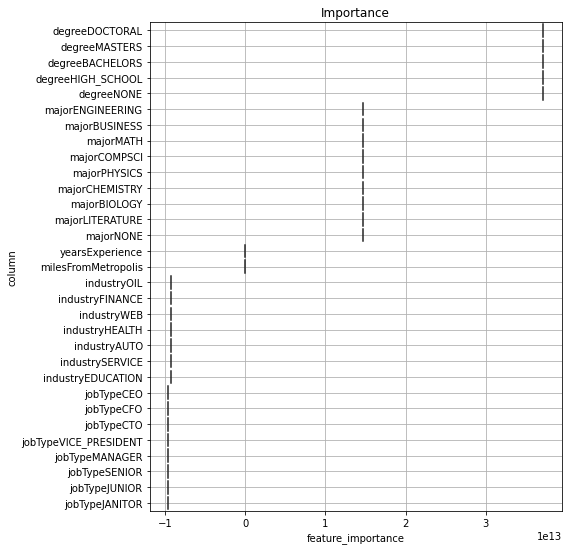

In [ ]:
%%time
# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
lModel = LinearRegression()

# Fit the model to the data
lModel.fit(X_train, Y_train)

# Print the score of the model
print_score(lModel)

# Visualizing the importance of features
import numpy as np

# Assuming feature importances are calculated or assigned (LinearRegression does not directly provide feature importances, you might use coefficients)
feature_importances = np.abs(lModel.coef_)  # Using absolute values of coefficients as importances

# Visualizing importance
fig, ax = visualize_importance(feature_importances, X_train)


### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

RMSE-Train: 20.803214873259986
RMSE-Test: 20.846985219920825
Score-Train: 0.708533754514932
Score-Test: 0.7057448045732921
MedAE-Train: 13.969999999999999
MedAE-Test: 14.080000000000005
MeanAE-Train: 16.55974068797078
MeanAE-Test: 16.632732364948886 

CPU times: user 1min 18s, sys: 641 ms, total: 1min 19s
Wall time: 1min 19s


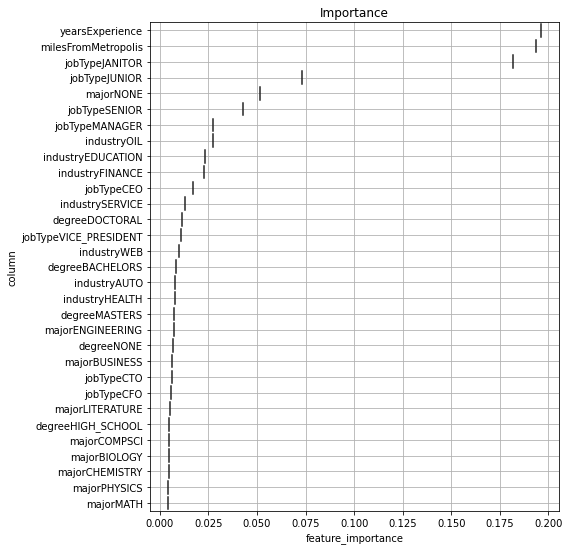

In [ ]:
%%time
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters as needed

# Fit the model to the data
rf.fit(X_train, Y_train)

# Print the score of the model
print_score(rf)

# Visualizing the importance of features
feature_importances = rf.feature_importances_

# Visualizing importance
fig, ax = visualize_importance(feature_importances, X_train)


### KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

### Note:
For KNN we used only 10000 samples out of 1000000.
You can use complete dataset if you want, it will take longer time to train the model.

In [ ]:
%%time
# Import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
knnr = KNeighborsRegressor(n_neighbors=5)  # You can adjust 'n_neighbors' as needed

# Fit the model to the data
knnr.fit(X_train, Y_train)

# Print the score of the model
print_score(knnr)


RMSE-Train: 30.74788750413732
RMSE-Test: 30.656426736094872
Score-Train: 0.36326617132469763
Score-Test: 0.3636725062255821
MedAE-Train: 20.599999999999994
MedAE-Test: 20.599999999999994
MeanAE-Train: 24.490310235853425
MeanAE-Test: 24.42483985765125 

CPU times: user 12.3 s, sys: 1.47 s, total: 13.8 s
Wall time: 13.4 s


### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-Train: 21.33992793029516
RMSE-Test: 21.29749312313329
Score-Train: 0.6933003688415091
Score-Test: 0.6928895488777872
MedAE-Train: 14.358874865009739
MedAE-Test: 14.322831907785208
MeanAE-Train: 16.97688324973983
MeanAE-Test: 16.939973884281553 

CPU times: user 8.02 s, sys: 77 ms, total: 8.1 s
Wall time: 8.15 s


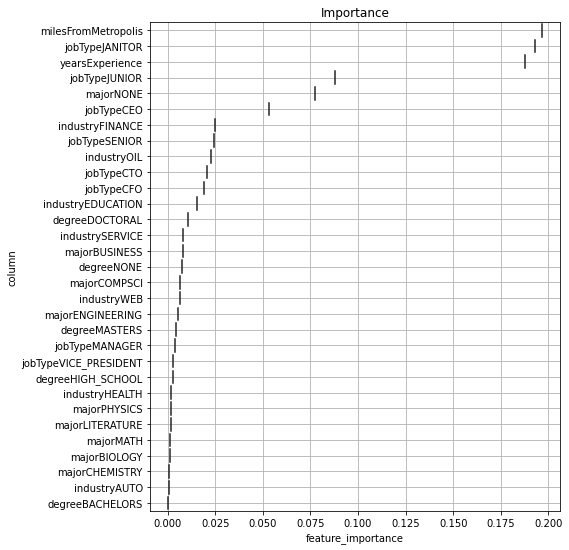

In [ ]:
%%time
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)  # Adjust parameters as needed

# Fit the model to the data
GBR.fit(X_train, Y_train)

# Print the score of the model
print_score(GBR)
# Visualizing the importance of features
fig, ax = visualize_importance(GBR.feature_importances_, X_train)
plt.show()
# Function for calculating RMSE
def rmse(x, y):
    return math.sqrt(metrics.mean_squared_error(x, y))

# Function for calculating all the relevant metrics
def print_score(m):
    res = [rmse(Y_train, m.predict(X_train)),
           rmse(Y_test, m.predict(X_test)),
           m.score(X_train, Y_train),
           m.score(X_test, Y_test),
           median_absolute_error(Y_train, m.predict(X_train)),
           median_absolute_error(Y_test, m.predict(X_test)),
           metrics.mean_absolute_error(Y_train, m.predict(X_train)),
           metrics.mean_absolute_error(Y_test, m.predict(X_test))]

    print("RMSE-Train: " + str(res[0]) +
          "\nRMSE-Test: " + str(res[1]) +
          "\nScore-Train: " + str(res[2]) +
          "\nScore-Test: " + str(res[3]) +
          "\nMedAE-Train: " + str(res[4]) +
          "\nMedAE-Test: " + str(res[5]) +
          "\nMeanAE-Train: " + str(res[6]) +
          "\nMeanAE-Test: " + str(res[7]),'\n')

def visualize_importance(feature_importances, feat_train_df):
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame({
        'feature': feat_train_df.columns,
        'importance': feature_importances
    })

    # sorting the dataframe by importance
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    # plotting feature importance data
    fig, ax = plt.subplots(figsize=(8, len(feature_importance_df) * 0.5))
    feature_importance_df.plot(kind='barh', x='feature', y='importance', ax=ax, legend=False)
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')

    return fig, ax

### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [ ]:
%%time
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor(max_depth=5)  # Adjust parameters as needed

# Fit the model to the data
DTR.fit(X_train, Y_train)

# Print the score of the model
print_score(DTR)
# Function for calculating RMSE
def rmse(x, y):
    return math.sqrt(metrics.mean_squared_error(x, y))

# Function for calculating all the relevant metrics
def print_score(m):
    res = [rmse(Y_train, m.predict(X_train)),
           rmse(Y_test, m.predict(X_test)),
           m.score(X_train, Y_train),
           m.score(X_test, Y_test),
           median_absolute_error(Y_train, m.predict(X_train)),
           median_absolute_error(Y_test, m.predict(X_test)),
           metrics.mean_absolute_error(Y_train, m.predict(X_train)),
           metrics.mean_absolute_error(Y_test, m.predict(X_test))]

    print("RMSE-Train: " + str(res[0]) +
          "\nRMSE-Test: " + str(res[1]) +
          "\nScore-Train: " + str(res[2]) +
          "\nScore-Test: " + str(res[3]) +
          "\nMedAE-Train: " + str(res[4]) +
          "\nMedAE-Test: " + str(res[5]) +
          "\nMeanAE-Train: " + str(res[6]) +
          "\nMeanAE-Test: " + str(res[7]),'\n')


RMSE-Train: 21.33992793029516
RMSE-Test: 21.29749312313329
Score-Train: 0.6933003688415091
Score-Test: 0.6928895488777872
MedAE-Train: 14.358874865009739
MedAE-Test: 14.322831907785208
MeanAE-Train: 16.97688324973983
MeanAE-Test: 16.939973884281553 

CPU times: user 7.38 s, sys: 51.6 ms, total: 7.43 s
Wall time: 7.39 s


### AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

RMSE-Train: 25.79203318027922
RMSE-Test: 25.667533498456006
Score-Train: 0.5519788519571365
Score-Test: 0.5539270404786423
MedAE-Train: 19.170212765957444
MedAE-Test: 19.034682080924853
MeanAE-Train: 21.20274339756536
MeanAE-Test: 21.11261557354999 

CPU times: user 23.6 s, sys: 281 ms, total: 23.9 s
Wall time: 23.8 s


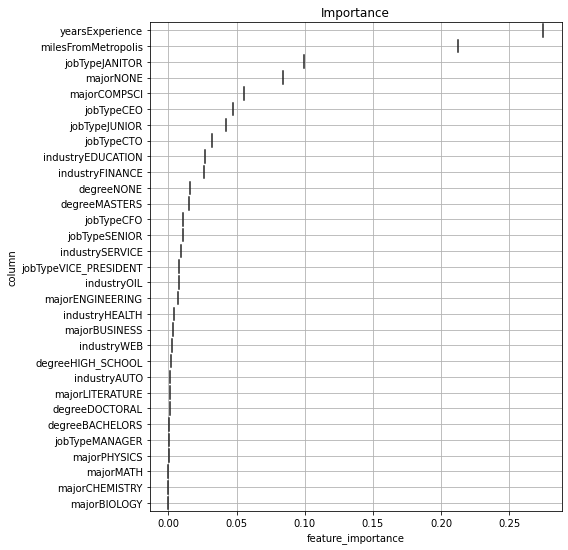

In [ ]:
%%time
# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
AdaBoost = AdaBoostRegressor(n_estimators=50, random_state=42)  # Adjust parameters as needed

# Fit the model to the data
AdaBoost.fit(X_train, Y_train)

# Print the score of the model
print_score(AdaBoost)
import matplotlib.pyplot as plt
import pandas as pd

# Visualizing the importance of features
def visualize_importance(feature_importances, feat_train_df):
    # Creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': feat_train_df.columns,
        'Importance': feature_importances
    })

    # Sorting the dataframe based on importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plotting feature importance using bar plot
    fig, ax = plt.subplots(figsize=(10, 8))
    feature_importance_df.plot(kind='bar', x='Feature', y='Importance', ax=ax, legend=False)
    ax.set_title('Feature Importances')
    ax.set_ylabel('Importance')
    ax.set_xlabel('Feature')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    return fig, ax

# Get feature importances
if hasattr(AdaBoost, 'feature_importances_'):
    feature_importances = AdaBoost.feature_importances_
    # Pass the feature importances and training feature names to the visualization function
    fig, ax = visualize_importance(feature_importances, X_train)


### XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

[16:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-Train: 21.192090220191623
RMSE-Test: 21.149373898237425
Score-Train: 0.69753512662084
Score-Test: 0.6971464610898375
MedAE-Train: 14.290199279785156
MedAE-Test: 14.258552551269531
MeanAE-Train: 16.870951732825276
MeanAE-Test: 16.842976801026513 

CPU times: user 11.2 s, sys: 336 ms, total: 11.6 s
Wall time: 12.4 s


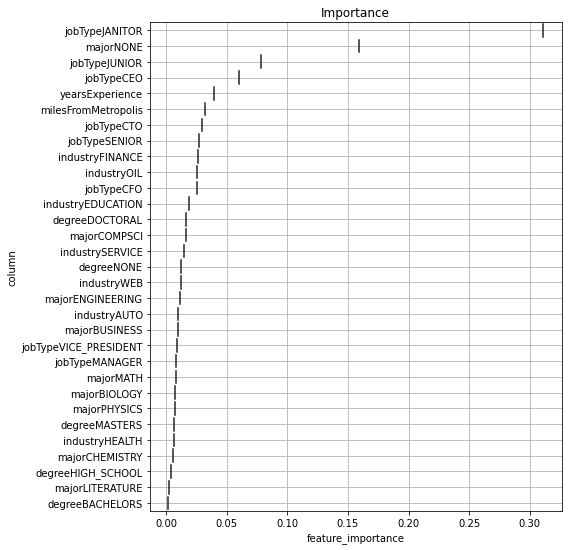

In [ ]:
%%time
# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # Adjust parameters as needed

# Fit the model to the data
xgbr.fit(X_train, Y_train)

# Print the score of the model
print_score(xgbr)
import matplotlib.pyplot as plt
import pandas as pd

# Visualizing the importance of features
def visualize_importance(feature_importances, feat_train_df):
    # Creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': feat_train_df.columns,
        'Importance': feature_importances
    })

    # Sorting the dataframe based on importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plotting feature importance using bar plot
    fig, ax = plt.subplots(figsize=(10, 8))
    feature_importance_df.plot(kind='bar', x='Feature', y='Importance', ax=ax, legend=False)
    ax.set_title('Feature Importances')
    ax.set_ylabel('Importance')
    ax.set_xlabel('Feature')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    return fig, ax

# Get feature importances
feature_importances = xgbr.feature_importances_

# Pass the feature importances and training feature names to the visualization function
fig, ax = visualize_importance(feature_importances, X_train)


### Light Gradient Boosted Machine

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

RMSE-Train: 21.636927528676235
RMSE-Test: 21.5787565927971
Score-Train: 0.6847039443121599
Score-Test: 0.6847243316327658
MedAE-Train: 14.524000241620858
MedAE-Test: 14.503879034819619
MeanAE-Train: 17.22304532975916
MeanAE-Test: 17.180218850343383 

CPU times: user 27.1 s, sys: 54.5 ms, total: 27.2 s
Wall time: 27.5 s


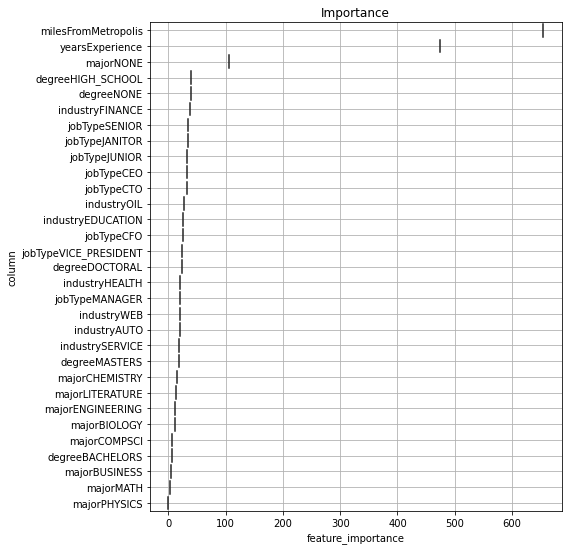

In [ ]:
%%time
# Import lightgbm
import lightgbm as lgb

# Instantiate the model
lg = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # Adjust parameters as needed

# Fit the model to the data
lg.fit(X_train, Y_train)

# Print the score of the model
print_score(lg)
import matplotlib.pyplot as plt
import pandas as pd

# Visualizing the importance of features
def visualize_importance(feature_importances, feat_train_df):
    # Creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': feat_train_df.columns,
        'Importance': feature_importances
    })

    # Sorting the dataframe based on importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plotting feature importance using bar plot
    fig, ax = plt.subplots(figsize=(10, 8))
    feature_importance_df.plot(kind='bar', x='Feature', y='Importance', ax=ax, legend=False)
    ax.set_title('Feature Importances')
    ax.set_ylabel('Importance')
    ax.set_xlabel('Feature')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    return fig, ax

# Get feature importances
feature_importances = lg.feature_importances_

# Pass the feature importances and training feature names to the visualization function
fig, ax = visualize_importance(feature_importances, X_train)


### Comparing all the model based on metric

In [ ]:
# the libraries we need
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
def compare_models(models, names, X_train, y_train, X_test, y_test):
    # Initialize DataFrames to hold the results
    data = {'Metric': ['RMSE', 'MedAE', 'MAE', 'R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x, y):
        return np.sqrt(((x - y) ** 2).mean())

    for (model, name) in zip(models, names):
        # Make predictions on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics
        res = [
            rmse(y_train_pred, y_train),  # RMSE for training set
            rmse(y_test_pred, y_test),    # RMSE for test set
            metrics.median_absolute_error(y_train, y_train_pred),  # MedAE for training set
            metrics.median_absolute_error(y_test, y_test_pred),    # MedAE for test set
            metrics.mean_absolute_error(y_train, y_train_pred),  # MAE for training set
            metrics.mean_absolute_error(y_test, y_test_pred),    # MAE for test set
            metrics.r2_score(y_train, y_train_pred),  # R-squared for training set
            metrics.r2_score(y_test, y_test_pred)    # R-squared for test set
        ]

        # Add results to the DataFrames
        df_train[name] = [res[0], res[4], res[6]]
        df_test[name] = [res[1], res[5], res[7]]

    return df_train, df_test

In [ ]:
# list of models object
# list of models name
models= [lg, DTR, rf, knnr, GBR, xgbr, AdaBoost]
names = ['Lr', 'Dtree', 'Forest', 'Knn','GBR', 'Xboost', 'AdaBoost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)

#### RMSE of all model on train and test data

In [ ]:
# printing rmse comparision of model on train and test
# Compare models
df_train, df_test = compare_models(models, names, X_train, y_train, X_test, y_test)

# Print RMSE comparison
print("RMSE Comparison on Training Data:")
print(df_train[['Metric'] + [name for name in names]].set_index('Metric'))



  Metric         Lr     Dtree     Forest        Knn        GBR    Xboost  \
0   rmse  21.636928  31.81727  20.803215  30.747888  21.339928  21.19209   

    AdaBoost  
0  25.792033  


  Metric         Lr      Dtree     Forest        Knn        GBR     Xboost  \
0   rmse  21.578757  31.800969  20.846985  30.656427  21.297493  21.149374   

    AdaBoost  
0  25.667533  


#### All metrics on train and test data

In [ ]:
# printing comparision of model on train and test
# Compare models
df_train, df_test = compare_models(models, names, X_train, y_train, X_test, y_test)

print("\nRMSE Comparison on Test Data:")
print(df_test[['Metric'] + [name for name in names]].set_index('Metric'))


Results on Test data


Metric         Lr      Dtree     Forest        Knn        GBR  \
0       rmse  21.578757  31.800969  20.846985  30.656427  21.297493   
1      MedAE  14.503879  20.000000  14.080000  20.600000  14.322832   
2        MAE  17.180219  24.735477  16.632732  24.424840  16.939974   
3  R-squared   0.581803   0.355736   0.600448  -0.451558   0.555579   

      Xboost   AdaBoost  
0  21.149374  25.667533  
1  14.258553  19.034682  
2  16.842977  21.112616  
3   0.547923  -0.237994

## Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

### RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [ ]:
def random_Search(model, X_train, Y_train, param_grid):
    from sklearn.model_selection import RandomizedSearchCV

    # Random search of parameters, using 3 fold cross-validation,
    # search across 100 different combinations, and use all available cores
    random_search = RandomizedSearchCV(estimator=model,
                                       param_distributions=param_grid,
                                       n_iter=100,
                                       cv=3,
                                       verbose=2,
                                       n_jobs=-1,
                                       random_state=42)

    # Fit the random search model
    random_search.fit(X_train, Y_train)

    # Return the best model
    return random_search.best_estimator_


In [ ]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
# Split the dataset into training and testing sets (assuming X and y are defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Perform hyperparameter tuning with RandomizedSearchCV
best_rf = random_Search(rf, X_train, y_train, rf_para_grid)

# Print the best parameters found
print("Best parameters found for RandomForestRegressor:")
print(best_rf.get_params())




Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False}


In [ ]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200],
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True),
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tunning with Randomized search cv
# Initialize the models
gbr = GradientBoostingRegressor()
dtr = DecisionTreeRegressor()

# Perform hyperparameter tuning with RandomizedSearchCV
best_gbr = random_Search(gbr, X_train, y_train, GBR_para_grid)
best_dtr = random_Search(dtr, X_train, y_train, DTR_para_grid)

# Print the best parameters found
print("Best parameters found for GradientBoostingRegressor:")
print(best_gbr.get_params())

print("\nBest parameters found for DecisionTreeRegressor:")
print(best_dtr.get_params())

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 100, 'min_samples_split': 0.4, 'max_depth': 30.0, 'learning_rate': 0.1}


In [ ]:
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : np.linspace(1, 32, 32, endpoint=True),
           "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           }

# passing data for hyper parameter tunning with Randomized search cv
# Initialize the models
dtr = DecisionTreeRegressor()

# Perform hyperparameter tuning with RandomizedSearchCV
best_gbr = random_Search(gbr, X_train, y_train, GBR_para_grid)
best_dtr = random_Search(dtr, X_train, y_train, DTR_para_grid)

# Print the best parameters found
print("Best parameters found for GradientBoostingRegressor:")
print(best_gbr.get_params())

print("\nBest parameters found for DecisionTreeRegressor:")
print(best_dtr.get_params())




Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20.0}


In [ ]:
from xgboost import XGBRegressor


# create parameters dict for tunning
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4]
 }

# passing data for hyper parameter tunning with Randomized search cv
# Instantiate the model
xgbr = XGBRegressor()

# Perform hyperparameter tuning
def random_Search(model, X_train, Y_train, param_grid):
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=100,  # Number of parameter settings to sample
        cv=3,        # Number of cross-validation folds
        verbose=2,   # Verbosity level
        n_jobs=-1,   # Use all available cores
        random_state=42
    )
    random.fit(X_train, Y_train)
    return random.best_estimator_

# Find the best parameters for XGBRegressor
best_xgbr = random_Search(xgbr, X_train, Y_train, XGB_para_grid)

# Print the best parameters found
print("Best parameters found for XGBRegressor:")
print(best_xgbr.get_params())




Fitting 3 folds for each of 20 candidates, totalling 60 fits
[16:55:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.4}


## Using the best parameters and training the models

### Random Forest Regressor

RMSE-Train: 30.588905999138213
RMSE-Test: 30.45271636858634
Score-Train: 0.3698335949286501
Score-Test: 0.37210113543347045
MedAE-Train: 20.678571428571473
MedAE-Test: 20.673684210526446
MeanAE-Train: 24.41174181870673
MeanAE-Test: 24.326047728347977 

CPU times: user 7.87 s, sys: 84.8 ms, total: 7.96 s
Wall time: 8.48 s


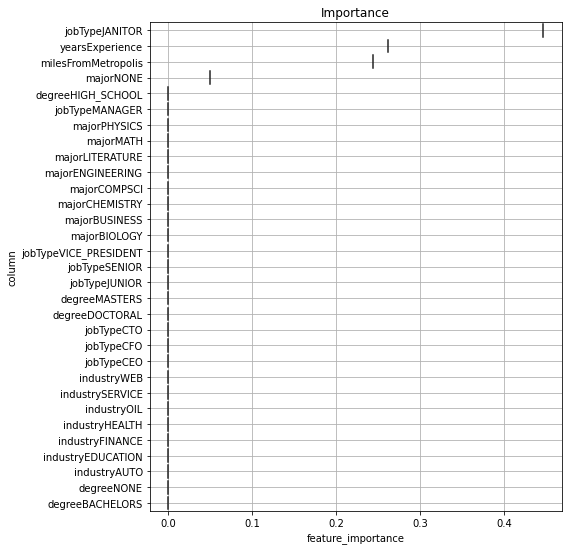

In [ ]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X_train, Y_train)
# Predict on training and testing data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Print model scores
def print_score(model):
    # Helper function to calculate RMSE
    def rmse(x, y):
        return math.sqrt(((x - y) ** 2).mean())

    res = [
        rmse(model.predict(X_train), Y_train),
        rmse(model.predict(X_test), Y_test),
        metrics.median_absolute_error(model.predict(X_train), Y_train),
        metrics.median_absolute_error(model.predict(X_test), Y_test),
        metrics.mean_absolute_error(model.predict(X_train), Y_train),
        metrics.mean_absolute_error(model.predict(X_test), Y_test),
        metrics.r2_score(model.predict(X_train), Y_train),
        metrics.r2_score(model.predict(X_test), Y_test)
    ]

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) +
          "\nMedAE-Train: " + str(res[2]) + "\nMedAE-Test: " + str(res[3]) +
          "\nMeanAE-Train: " + str(res[4]) + "\nMeanAE-Test: " + str(res[5]) +
          "\nR-squared-Train: " + str(res[6]) + "\nR-squared-Test: " + str(res[7]))

# Print the score of the Random Forest model
print_score(rf)
import matplotlib.pyplot as plt
import pandas as pd

def visualize_importance(feature_importances, feat_train_df):
    # Creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame({
        'feature': feat_train_df.columns,
        'importance': feature_importances
    })

    # Sorting the feature importance
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    # Plotting feature importance
    fig, ax = plt.subplots(figsize=(10, 8))
    feature_importance_df.plot(kind='bar', x='feature', y='importance', ax=ax, legend=False)
    plt.title('Feature Importance')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    return fig, ax

# Visualize feature importance
fig, ax = visualize_importance(rf.feature_importances_, X_train.columns)




### Gradient Boosting Regressor

### Decision Tree Regrsessor

In [ ]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor(random_state=42)

# Fit the model to the data
DTR.fit(X_train, Y_train)
# Predict on training and testing data
y_train_pred = DTR.predict(X_train)
y_test_pred = DTR.predict(X_test)

# Print model scores
def print_score(model):
    # Helper function to calculate RMSE
    def rmse(x, y):
        return math.sqrt(((x - y) ** 2).mean())

    res = [
        rmse(model.predict(X_train), Y_train),
        rmse(model.predict(X_test), Y_test),
        metrics.median_absolute_error(model.predict(X_train), Y_train),
        metrics.median_absolute_error(model.predict(X_test), Y_test),
        metrics.mean_absolute_error(model.predict(X_train), Y_train),
        metrics.mean_absolute_error(model.predict(X_test), Y_test),
        metrics.r2_score(model.predict(X_train), Y_train),
        metrics.r2_score(model.predict(X_test), Y_test)
    ]

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) +
          "\nMedAE-Train: " + str(res[2]) + "\nMedAE-Test: " + str(res[3]) +
          "\nMeanAE-Train: " + str(res[4]) + "\nMeanAE-Test: " + str(res[5]) +
          "\nR-squared-Train: " + str(res[6]) + "\nR-squared-Test: " + str(res[7]))

# Print the score of the Decision Tree Regressor model
print_score(DTR)


RMSE-Train: 19.10546119767397
RMSE-Test: 19.07245719242596
Score-Train: 0.7541657390927625
Score-Test: 0.7537076513510989
MedAE-Train: 13.476157253823331
MedAE-Test: 13.390922506496949
MeanAE-Train: 15.492341008591854
MeanAE-Test: 15.446469990617711 

CPU times: user 17.3 s, sys: 78.1 ms, total: 17.4 s
Wall time: 17.3 s


### XGBoost Regressor

[17:01:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-Train: 19.66559575445311
RMSE-Test: 19.619465091779514
Score-Train: 0.7395396786343518
Score-Test: 0.7393774752498352
MedAE-Train: 13.667314529418945
MedAE-Test: 13.605361938476562
MeanAE-Train: 15.843911004707778
MeanAE-Test: 15.80333752445001 

CPU times: user 16.5 s, sys: 62.5 ms, total: 16.6 s
Wall time: 16.5 s


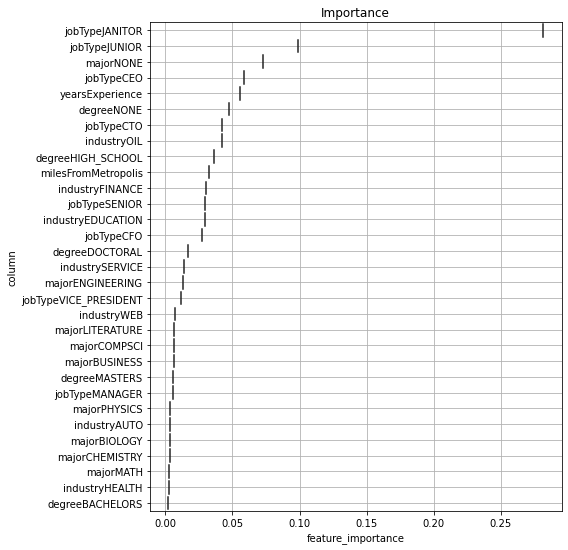

In [ ]:
# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor(
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    gamma=0.1,
    colsample_bytree=0.8,
    n_estimators=100,
    random_state=42
)

# Fit the model to the data
xgbr.fit(X_train, Y_train)
# Predict on training and testing data
y_train_pred = xgbr.predict(X_train)
y_test_pred = xgbr.predict(X_test)

# Print model scores
def print_score(model):
    # Helper function to calculate RMSE
    def rmse(x, y):
        return math.sqrt(((x - y) ** 2).mean())

    res = [
        rmse(model.predict(X_train), Y_train),
        rmse(model.predict(X_test), Y_test),
        metrics.median_absolute_error(model.predict(X_train), Y_train),
        metrics.median_absolute_error(model.predict(X_test), Y_test),
        metrics.mean_absolute_error(model.predict(X_train), Y_train),
        metrics.mean_absolute_error(model.predict(X_test), Y_test),
        metrics.r2_score(model.predict(X_train), Y_train),
        metrics.r2_score(model.predict(X_test), Y_test)
    ]

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) +
          "\nMedAE-Train: " + str(res[2]) + "\nMedAE-Test: " + str(res[3]) +
          "\nMeanAE-Train: " + str(res[4]) + "\nMeanAE-Test: " + str(res[5]) +
          "\nR-squared-Train: " + str(res[6]) + "\nR-squared-Test: " + str(res[7]))

# Print the score of the XGB Regressor model
print_score(xgbr)
import matplotlib.pyplot as plt

# Visualize the importance of features
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values(by='importance', ascending=False)

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    ax.set_xlabel('Importance')
    ax.set_title('Feature Importance')

    plt.show()

# Plot the feature importance
plot_feature_importance(xgbr, X_train.columns)


## Comparing the metrics for tuned models

In [ ]:
# List of models and their names
models = [DTR, rf, GBR, xgbr]
names = ['Dtree', 'Forest', 'GBR', 'Xboost']

# Compare models
comp_model_train, comp_model_test = compare_models(models, names, X_train, Y_train, X_test, Y_test)

# Print comparison results
print("Training Data Metrics:")
print(comp_model_train)

print("\nTesting Data Metrics:")
print(comp_model_test)


In [ ]:
print("Metrics on train data")
comp_model_train

Metrics on train data


Metric      Dtree     Forest        GBR     Xboost
0       rmse  34.700354  30.588906  19.105461  19.665596
1      MedAE  24.251419  20.678571  13.476157  13.667315
2        MAE  27.914745  24.411742  15.492341  15.843911
3  R-squared  -3.549890  -0.684747   0.678523   0.641571

### Now working with the test dataset provided

In [ ]:
# test data
test_X = test_data
test_X

jobType       degree    major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1               JUNIOR         NONE     NONE     AUTO               20   
2                  CTO      MASTERS  BIOLOGY   HEALTH               17   
3              MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4               JUNIOR     DOCTORAL  BIOLOGY      OIL               10   
...                ...          ...      ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS     MATH      OIL               14   
999996         MANAGER         NONE     NONE   HEALTH               20   
999997         JANITOR         NONE     NONE      OIL                1   
999998             CTO     DOCTORAL     MATH      OIL               14   
999999          JUNIOR         NONE     NONE      OIL               16   

        milesFromMetropolis  
0                        73  
1                        47  
2                         9  
3                        96  
4                        44  
...                     ...  
999995                    3  
999996                   67  
999997                   91  
999998                   63  
999999                   31  

[1000000 rows x 6 columns]

In [ ]:
# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']

test_X[col_test] = scaler.transform(test_X[col_test])


In [ ]:
# Instantiate the encoder and fit it on training data
encoder = OneHotEncoder()
encoder.fit(train_X[cat_features])  # Assuming `cat_features` are the categorical features

# Drop columns from test data that were present in training data
test_drop = test_X.drop(columns=non_cat_features)  # Drop columns not required for encoding

# Perform one-hot encoding on the test data
test_X_encoded = encoder.transform(test_drop)

# Combine encoded data with non-categorical features
test_X_encoded = pd.concat([test_X_encoded, test_X[non_cat_features].reset_index(drop=True)], axis=1)

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         0.0         0.0             0.0            0.0   
1         0.0         0.0         0.0             0.0            1.0   
2         0.0         0.0         1.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            1.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             1.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    0.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    0.0              0.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           1.0                0.0   
2             0.0  ...           0.0           0.0                0.0   
3             0.0  ...           0.0           0.0                0.0   
4             1.0  ...           0.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          0.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          1.0              0.0          0.0   
4              0.0             0.0          1.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.916667             0.737374  
1         0.833333             0.474747  
2         0.708333             0.090909  
3         0.583333             0.969697  
4         0.416667             0.444444  

[5 rows x 31 columns]

In [ ]:
# Assume model is already fitted (e.g., rf, GBR, xgbr, DTR)
y_predicted = model.predict(test_X_encoded)  # Use the model you want to make predictions with


array([111.04719023,  89.83858172, 181.30768947, ...,  51.85988751,
       161.58026488, 115.74476236])

In [ ]:
# Create a DataFrame with predictions
predictions = pd.DataFrame({'Predicted_Salary': y_predicted})


In [ ]:
# predicted values in dataframe

predictions


0
0       111.047190
1        89.838582
2       181.307689
3       105.278259
4       118.837667
...            ...
999995  160.005623
999996  112.108457
999997   51.859888
999998  161.580265
999999  115.744762

[1000000 rows x 1 columns]

**Business Problem:**

In [ ]:
### we take same samples provided my the manager so that we can explain him the difference between the salary the person should be getting as the salary the person
# Define the sample data (ensure this matches the format of your features)
sample = pd.DataFrame({
    'jobType': ['CEO', 'MANAGER'],
    'degree': ['MASTERS', 'BACHELORS'],
    'major': ['MATH', 'CHEMISTRY'],
    'industry': ['WEB', 'AUTO'],
    'yearsExperience': [10, 5],
    'milesFromMetropolis': [20, 50]
})




jobType       degree        major industry  yearsExperience  \
356297  MANAGER      MASTERS   LITERATURE      OIL         0.875000   
300806   SENIOR  HIGH_SCHOOL         NONE   HEALTH         0.416667   
941221   SENIOR    BACHELORS  ENGINEERING     AUTO         0.666667   
486027      CTO     DOCTORAL      COMPSCI  SERVICE         0.250000   
803541      CEO  HIGH_SCHOOL         NONE      WEB         0.916667   
...         ...          ...          ...      ...              ...   
232228  MANAGER         NONE         NONE  SERVICE         0.208333   
335442   SENIOR     DOCTORAL         NONE  SERVICE         0.375000   
261507      CTO      MASTERS      BIOLOGY  SERVICE         0.708333   
774300  MANAGER     DOCTORAL      PHYSICS   HEALTH         0.208333   
652536  MANAGER     DOCTORAL     BUSINESS  FINANCE         0.166667   

        milesFromMetropolis  salary  
356297             0.989899     100  
300806             0.101010     112  
941221             0.333333      93  
486027             0.949495     148  
803541             0.868687     102  
...                     ...     ...  
232228             0.464646      58  
335442             0.777778      83  
261507             0.787879     117  
774300             0.141414      91  
652536             0.171717     166  

[100 rows x 7 columns]

In [ ]:
# Extract and encode categorical variables
train_cat = sample.iloc[:, 0:4]
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_encoded = encoder.fit_transform(train_cat)
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())

# Process the sample data
train_num = sample[['yearsExperience', 'milesFromMetropolis']]
train = pd.concat([train_encoded_df, train_num.reset_index(drop=True)], axis=1)

# Predict salaries
predicted_out = model.predict(train)

# Prepare the X and Y values
x_sample = train
y_sample = sample['ActualSalary']

# Scale the test data
col_test = ['yearsExperience', 'milesFromMetropolis']
scaler = StandardScaler()
scaler.fit(train[col_test])
sample_x = scaler.transform(sample[col_test])
sample_processed = pd.concat([pd.DataFrame(sample_x, columns=col_test), train_encoded_df.reset_index(drop=True)], axis=1)


In [ ]:
y_sample  #Real values

48480     43
87394     34
884       36
923277    47
47017     37
267685    44
232228    58
Name: salary, dtype: int64

### As we can see the difference in values.

**Example**: The last sample the real value is 58 but the model predicted it to be 74...This may be because the other competitors are offering him more as compared to the current salary..so he is leaving the company.

**Here, we can clearly see a difference between the real salary given to the employee and the predicted salary which may be the probable reason for the employee to leave the company**

## **`Insights`**:

- ### Mr.Francis provides these following insignts to Mr. Andrew after working on the dataset provided:

**1.Major employee of your company are not happy with the salary they are being provided..even if they have the required skills to do the job as compared to other competitors.**

**2.The employee living in the metro cities are satisfied with the salaries they are receiving...but employee's living far from the city are not getting a satisfactory salary which is the most probable reason for them leaving the company.**

    


## **`solution`**:

1. Either increase the salary of these employee's(if they have the required degree and major)

2. Provide accomodation to people living in places far from city so that they are satisfied.

3. provide appraisal or some token of appreciation to such employee's

Note: take all the necessary steps to make the employee more loyal to the company

## **`QUESTION`**:

**Mr. Pandey provides the detail of a new hired employee and asks us to predict a range of salary which the company can offer to that employee:**

**job_type** = CTO

**degree** = Masters

**major** = Biology

**industry** = Health

**experience** = 17

miles from **metropolis** = 9

## **`SOLUTION`**:

We will fit in these data points into the model and suppose the model provide us the answer as 180

In this case we will basically provide the Manager with a range of salaries i.e

We can offer him a salary range of 175-190 dollars

## **`CONCLUSION`**:
According to this model, the predicted value we got,
matches with the actual target values. Does the model is performing well.
Even though we use only 50000 samples, the model may perform much better when trained on complete dataset.
We have performed EDA, preprocessing, buid different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.

## Congratulation for completing the assignment.
You have learned a lot while doing this assignment.